Author : Namita Rana

### Project Name

Time Series Analysis on Monthly Crime Rates in Seattle.

## Data Understanding:

### Dataset Details

## Dataset Name : SPD Crime Data: 2008-Present

* Source: [https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5]
* Steps to retrieve dataset:
* Step1: Click on the link provided.
* Step2: Click on export,the file can be save as csv.
* Step3: Read the csv with pandas.

* The data were collected from Seattle Police Department. The data covered the reported offenses and offense categorization coded to simulate the standard reported to the FBI under the National Incident Based Reporting System (NIBRS) in Seattle from February 2010 to February, 2020. In its original form, it had detailed variables including offense ID, sector,offense Parent Group,Precinct, Sector,Offense, and so on. Each row contains the record of a unique event where at least one criminal offense was reported by a member of the community or detected by an officer in the field.

### What's in this Dataset? : 

* Total : 962145 rows × 17 columns

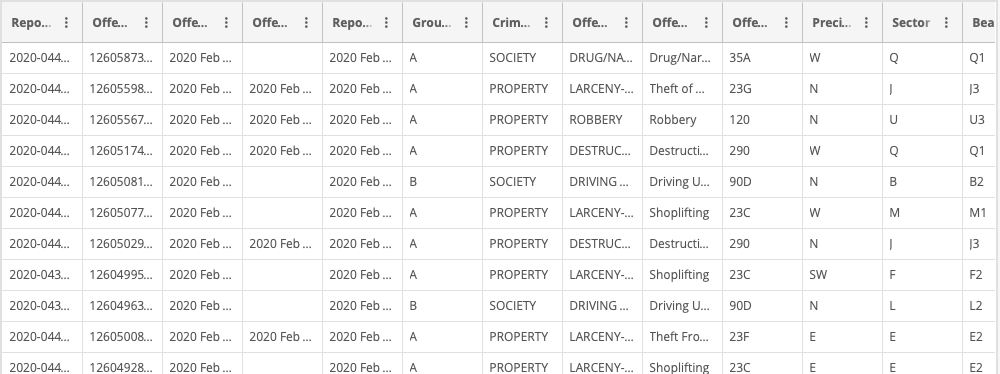

### Columns:

* Column Name : Description
* Report Number: Primary key/UID for the overall report. One report can contain multiple offenses, as denoted by the Offense ID.
* Offense ID: Distinct identifier to denote when there are multiple offenses associated with a single report.
* Offense Start DateTime: Start date and time the offense(s) occurred.
* Offense End DateTime: End date and time the offense(s) occurred, when applicable.
* Report DateTime: Date and time the offense(s) was reported. (Can differ from date of occurrence)
* Group A B: Corresponding offense group.
* Crime Against Category: Corresponding offense crime against category.
* Offense Parent Group: Offense_Parent_Group
* Offense: Corresponding offense.
* Offense Code: Corresponding offense code.
* Precinct: Designated police precinct boundary where offense(s) occurred.
* Sector: Designated police sector boundary where offense(s) occurred.
* Beat: Designated police sector boundary where offense(s) occurred.
* MCPP: Designated Micro-Community Policing Plans (MCPP) boundary where offense(s) occurred.
* 100 Block Address: Offense(s) address location blurred to the one hundred block.
* Longitude: Offense(s) spatial coordinate blurred to the one hundred block.
* Latitude: Offense(s) spatial coordinate blurred to the one hundred block.

## Business Understanding
## Business Problem:

The goal of this modelling is to forecast the crime rates,to figure out which crimes are more frequent,and to make predictions for the number of monthly violent crimes that will occur in future months.

Stakeholder: Seattle Police Department.

### Questions that we want to understand.
* Question1: Does the monthly crimes in Seattle from 2008 to 2020 has an increasing trend?
* Question2: Does the monthly crimes in Seattle from 2008 to 2020 has any time-related patterns that could be explained by ARIMA or SARIMA models?

### Background:

Seattle is the home place of grunge music, a tech hub and a city that prides itself in progress and innovation. It is a beautiful city that is surrounded by lush landscapes and deserves a place on your itinerary.

According to the most recent data from the FBI, the total crime rate in Seattle is 5,081.0 per 100,000 people. That's 105.15% higher than the national rate of 2,476.7 per 100,000 people and 70.75% higher than the Washington total crime rate of 2,975.8 per 100,000 people.

Seattle saw substantial spikes in the number of aggravated assaults and robberies last year, which were largely responsible for the 20% overall increase in violent crime the city experienced in 2021, according to the Seattle Police Department’s year-end crime report.

That report,said the number of aggravated assaults that occurred in Seattle last year — 3,925 — is the most the city has seen in 10 years. It also represents a 24% increase over 2020 totals.

### Methods
### Cleaning and Feature Engineering
This project uses data cleaning and feature engineering to also addressed the non-stationarity,trend,seasonality in the time series.

Since, the time series was nonstationary which means the status of a time series whose statistical properties are changing through time.
We used Statistical test like: Augmented Dickey-Fuller test to check if our series is stationary or not.

Also,we tried to make time series stationary by Differencing.


## Models Development
We have implemented ARIMA,SARIMAX model's with different parameters,with automated parameters generated using auto_arima  to see how results varies with each change in the parameters.Also performed a gridSeach to find the best paramters with low AIC scores.

We are focussed on finding the best model for our time series in terms of lowest Mean Absolute Percentage as it is unit-free and is safe to use for comparing performances of time series forecast values with different units. 

### Metrics used:
MAPE(Mean Absolute Percentage Error)
MAE(Mean Absolute Error)

Import Packages and Functions
We'll make use of the following packages:

numpy and pandas,sklearn is what we'll use to manipulate our data.

matplotlib.pyplot and seaborn will be used to produce plots for visualization.

util will provide the locally defined utility functions that have been provided for this assignment.

Run the next cell to import all the necessary packages.

In [788]:
#Importing the generic libraries.
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from numpy import sqrt 
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [789]:
#Import modelling libraries
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from datetime import timedelta
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

### Loading the dataset.

In [790]:
#obtain the data and read the file.
df = pd.read_csv('SPD_Crime_Data__2008-Present.csv', index_col= False)
df

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,NaN,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,NaN,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909


In [791]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962145 entries, 0 to 962144
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Number           962145 non-null  object 
 1   Offense ID              962145 non-null  int64  
 2   Offense Start DateTime  961188 non-null  object 
 3   Offense End DateTime    530966 non-null  object 
 4   Report DateTime         962145 non-null  object 
 5   Group A B               962145 non-null  object 
 6   Crime Against Category  962145 non-null  object 
 7   Offense Parent Group    962145 non-null  object 
 8   Offense                 962145 non-null  object 
 9   Offense Code            962145 non-null  object 
 10  Precinct                962141 non-null  object 
 11  Sector                  962143 non-null  object 
 12  Beat                    962143 non-null  object 
 13  MCPP                    962142 non-null  object 
 14  100 Block Address   

In [792]:
#describe the data
df.describe()

,Offense ID,Longitude,Latitude
count,9.621450e+05,962145.000000,962145.000000
mean,9.973092e+09,-117.492657,45.739128
std,5.590633e+09,23.842952,9.282055
min,7.624429e+09,-122.432252,0.000000
25%,7.652601e+09,-122.347561,47.581983
50%,7.679801e+09,-122.329059,47.614163
75%,7.698945e+09,-122.310168,47.663654
max,3.172592e+10,0.000000,47.774843


### Exploratory Data Analysis:
We will look at the time series data in terms of what information is unnique, grouping hte data to get some relevant information.

In [793]:
#looking at unique values in offensecode
df['Offense Code'].unique()

array(['35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280', '26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F',
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B'], dtype=object)

In [794]:
df['Precinct'].unique()

array(['W', 'N', 'SW', 'E', 'S', 'UNKNOWN', 'OOJ', nan, '<Null>'],
      dtype=object)

In [795]:
df['Sector'].unique()

array(['Q', 'J', 'U', 'B', 'M', 'F', 'L', 'E', 'R', 'O', 'K', 'C', 'N',
       'G', 'W', 'D', 'S', '99', 'UNKNOWN', '9512', 'SE', 'W2', 'OOJ',
       nan, '<Null>', '6804', '1700'], dtype=object)

In [796]:
df['Beat'].unique()

array(['Q1', 'J3', 'U3', 'B2', 'M1', 'F2', 'L2', 'E2', 'U2', 'R3', 'R1',
       'E1', 'O3', 'Q3', 'O2', 'K2', 'Q2', 'C3', 'N2', 'G2', 'W2', 'K1',
       'B3', 'M3', 'W3', 'W1', 'D2', 'K3', 'D3', 'G1', 'R2', 'E3', 'F3',
       'N1', 'D1', 'U1', 'F1', 'G3', 'B1', 'N3', 'M2', 'C2', 'S3', 'L1',
       'S1', 'J1', 'J2', 'S2', 'L3', 'C1', 'O1', '99', 'UNKNOWN', 'OOJ',
       nan, '<Null>'], dtype=object)

In [797]:
df['Offense ID'].unique()

array([12605873663, 12605598696, 12605567653, ...,  7672915592,
        7692227482,  7686420892])

In [798]:
df.isna().sum()

Report Number                  0
Offense ID                     0
Offense Start DateTime       957
Offense End DateTime      431179
Report DateTime                0
Group A B                      0
Crime Against Category         0
Offense Parent Group           0
Offense                        0
Offense Code                   0
Precinct                       4
Sector                         2
Beat                           2
MCPP                           3
100 Block Address          38034
Longitude                      0
Latitude                       0
dtype: int64

In [799]:
df['Group A B' ].unique()

array(['A', 'B'], dtype=object)

In [800]:
df['Sector'].value_counts()

U          75417
B          69518
M          68592
K          67472
E          67455
D          63797
Q          61666
R          59704
L          58680
N          54654
J          50850
W          49162
S          48900
F          46860
C          42899
G          40146
O          29862
UNKNOWN     6404
99            91
OOJ            7
1700           2
6804           1
9512           1
<Null>         1
W2             1
SE             1
Name: Sector, dtype: int64

In [801]:
df.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


In [802]:
#convert to datetime
df["date"] = pd.to_datetime(df["Offense Start DateTime"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.day_name()
df["hour"] = df["date"].dt.hour
df["Date"] = df["date"].dt.date
df = df.drop("date", axis=1)
df

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Beat,MCPP,100 Block Address,Longitude,Latitude,year,month,day_of_week,hour,Date
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,...,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020.0,2.0,Wednesday,10.0,2020-02-05
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,...,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020.0,2.0,Monday,8.0,2020-02-03
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,...,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020.0,2.0,Sunday,20.0,2020-02-02
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020.0,2.0,Wednesday,1.0,2020-02-05
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,...,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020.0,2.0,Wednesday,0.0,2020-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702,2013.0,7.0,Saturday,1.0,2013-07-13
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251,2013.0,6.0,Wednesday,11.0,2013-06-26
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,NaN,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,...,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894,2012.0,2.0,Tuesday,15.0,2012-02-14
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,NaN,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,...,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909,2010.0,9.0,Sunday,16.0,2010-09-19


In [803]:
# Map day values to proper strings
dmap1 = {1.0:'January',2.0:'February',3.0:'March',4.0:'April',5.0:'May',6.0:'June',7.0:'July',8.0:'August',9.0:'September',10.0:'Ocotober',11.0:'November',12.0:'December'}
df['month'] = df['month'].map(dmap1)
df

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Beat,MCPP,100 Block Address,Longitude,Latitude,year,month,day_of_week,hour,Date
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,...,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020.0,February,Wednesday,10.0,2020-02-05
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,...,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020.0,February,Monday,8.0,2020-02-03
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,...,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020.0,February,Sunday,20.0,2020-02-02
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020.0,February,Wednesday,1.0,2020-02-05
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,...,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020.0,February,Wednesday,0.0,2020-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702,2013.0,July,Saturday,1.0,2013-07-13
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251,2013.0,June,Wednesday,11.0,2013-06-26
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,NaN,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,...,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894,2012.0,February,Tuesday,15.0,2012-02-14
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,NaN,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,...,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909,2010.0,September,Sunday,16.0,2010-09-19


In [804]:
#Dropping unncessary columns:
# Will be keeping offence Parent Group and droping offense, offense end datetime,Beat,100 Block Address ,
df_new = df.drop(columns =['Offense End DateTime','Offense','100 Block Address'],axis=1)
df_new

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,year,month,day_of_week,hour,Date
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,35A,W,Q,Q1,MAGNOLIA,-122.385974,47.649387,2020.0,February,Wednesday,10.0,2020-02-05
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,23G,N,J,J3,ROOSEVELT/RAVENNA,-122.323399,47.675118,2020.0,February,Monday,8.0,2020-02-03
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,120,N,U,U3,ROOSEVELT/RAVENNA,-122.299552,47.666384,2020.0,February,Sunday,20.0,2020-02-02
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,W,Q,Q1,MAGNOLIA,-122.384865,47.642927,2020.0,February,Wednesday,1.0,2020-02-05
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,90D,N,B,B2,BALLARD SOUTH,-122.366195,47.662193,2020.0,February,Wednesday,0.0,2020-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,SW,F,F1,PIGEON POINT,-122.359028,47.565702,2013.0,July,Saturday,1.0,2013-07-13
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,W,Q,Q3,QUEEN ANNE,-122.355386,47.626251,2013.0,June,Wednesday,11.0,2013-06-26
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,23C,N,U,U1,ROOSEVELT/RAVENNA,-122.317464,47.681894,2012.0,February,Tuesday,15.0,2012-02-14
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,23C,W,M,M3,DOWNTOWN COMMERCIAL,-122.335018,47.610909,2010.0,September,Sunday,16.0,2010-09-19


In [805]:
df_new['Date'].value_counts()

2020-05-18    764
2020-05-15    667
2020-03-08    658
2020-05-14    621
2020-05-20    584
             ... 
2005-09-13      1
2007-01-07      1
2006-01-25      1
1989-05-14      1
1997-11-01      1
Name: Date, Length: 5865, dtype: int64

In [806]:
df_new['dt_Year'] = pd.to_datetime(df_new.Date,format='%Y',exact=False)

In [472]:
df_new

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,year,month,day_of_week,hour,Date,dt_Year
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,35A,W,Q,Q1,MAGNOLIA,-122.385974,47.649387,2020.0,February,Wednesday,10.0,2020-02-05,2020-01-01
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,23G,N,J,J3,ROOSEVELT/RAVENNA,-122.323399,47.675118,2020.0,February,Monday,8.0,2020-02-03,2020-01-01
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,120,N,U,U3,ROOSEVELT/RAVENNA,-122.299552,47.666384,2020.0,February,Sunday,20.0,2020-02-02,2020-01-01
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,W,Q,Q1,MAGNOLIA,-122.384865,47.642927,2020.0,February,Wednesday,1.0,2020-02-05,2020-01-01
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,90D,N,B,B2,BALLARD SOUTH,-122.366195,47.662193,2020.0,February,Wednesday,0.0,2020-02-05,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,SW,F,F1,PIGEON POINT,-122.359028,47.565702,2013.0,July,Saturday,1.0,2013-07-13,2013-01-01
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,W,Q,Q3,QUEEN ANNE,-122.355386,47.626251,2013.0,June,Wednesday,11.0,2013-06-26,2013-01-01
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,23C,N,U,U1,ROOSEVELT/RAVENNA,-122.317464,47.681894,2012.0,February,Tuesday,15.0,2012-02-14,2012-01-01
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,23C,W,M,M3,DOWNTOWN COMMERCIAL,-122.335018,47.610909,2010.0,September,Sunday,16.0,2010-09-19,2010-01-01


In [473]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962145 entries, 0 to 962144
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Report Number           962145 non-null  object        
 1   Offense ID              962145 non-null  int64         
 2   Offense Start DateTime  961188 non-null  object        
 3   Report DateTime         962145 non-null  object        
 4   Group A B               962145 non-null  object        
 5   Crime Against Category  962145 non-null  object        
 6   Offense Parent Group    962145 non-null  object        
 7   Offense Code            962145 non-null  object        
 8   Precinct                962141 non-null  object        
 9   Sector                  962143 non-null  object        
 10  Beat                    962143 non-null  object        
 11  MCPP                    962142 non-null  object        
 12  Longitude               962145

In [807]:
#Restting the index of the dataframe
df_new.reset_index(drop=True, inplace=True)
df_new

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,year,month,day_of_week,hour,Date,dt_Year
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,35A,W,Q,Q1,MAGNOLIA,-122.385974,47.649387,2020.0,February,Wednesday,10.0,2020-02-05,2020-01-01
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,23G,N,J,J3,ROOSEVELT/RAVENNA,-122.323399,47.675118,2020.0,February,Monday,8.0,2020-02-03,2020-01-01
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,120,N,U,U3,ROOSEVELT/RAVENNA,-122.299552,47.666384,2020.0,February,Sunday,20.0,2020-02-02,2020-01-01
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,W,Q,Q1,MAGNOLIA,-122.384865,47.642927,2020.0,February,Wednesday,1.0,2020-02-05,2020-01-01
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,90D,N,B,B2,BALLARD SOUTH,-122.366195,47.662193,2020.0,February,Wednesday,0.0,2020-02-05,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,SW,F,F1,PIGEON POINT,-122.359028,47.565702,2013.0,July,Saturday,1.0,2013-07-13,2013-01-01
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,W,Q,Q3,QUEEN ANNE,-122.355386,47.626251,2013.0,June,Wednesday,11.0,2013-06-26,2013-01-01
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,23C,N,U,U1,ROOSEVELT/RAVENNA,-122.317464,47.681894,2012.0,February,Tuesday,15.0,2012-02-14,2012-01-01
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,23C,W,M,M3,DOWNTOWN COMMERCIAL,-122.335018,47.610909,2010.0,September,Sunday,16.0,2010-09-19,2010-01-01


#### Visualizations to understand the data.
LEt's visualize the data to understand it better.

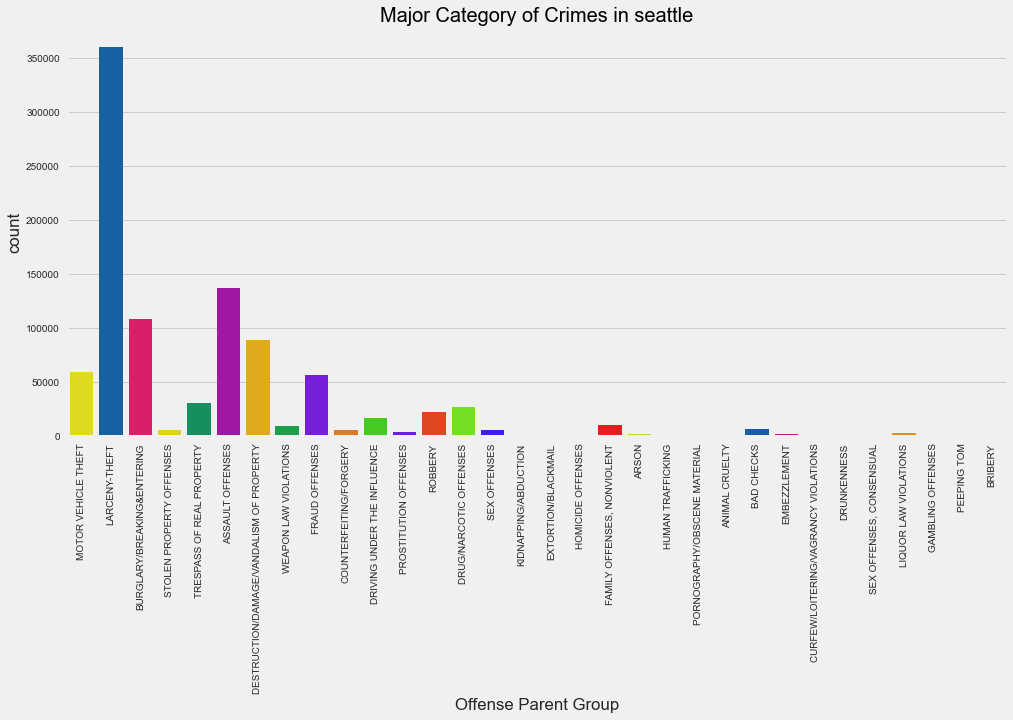

In [916]:
#Different categories of crime:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.countplot(df_new['Offense Parent Group'].sort_index(ascending=False), palette = 'prism',color='Black')
plt.title('Major Category of Crimes in seattle', fontweight = 30, fontsize = 20,color='Black')
plt.xticks(rotation = 90)
plt.savefig("Major Category of Crime.png")
plt.show()

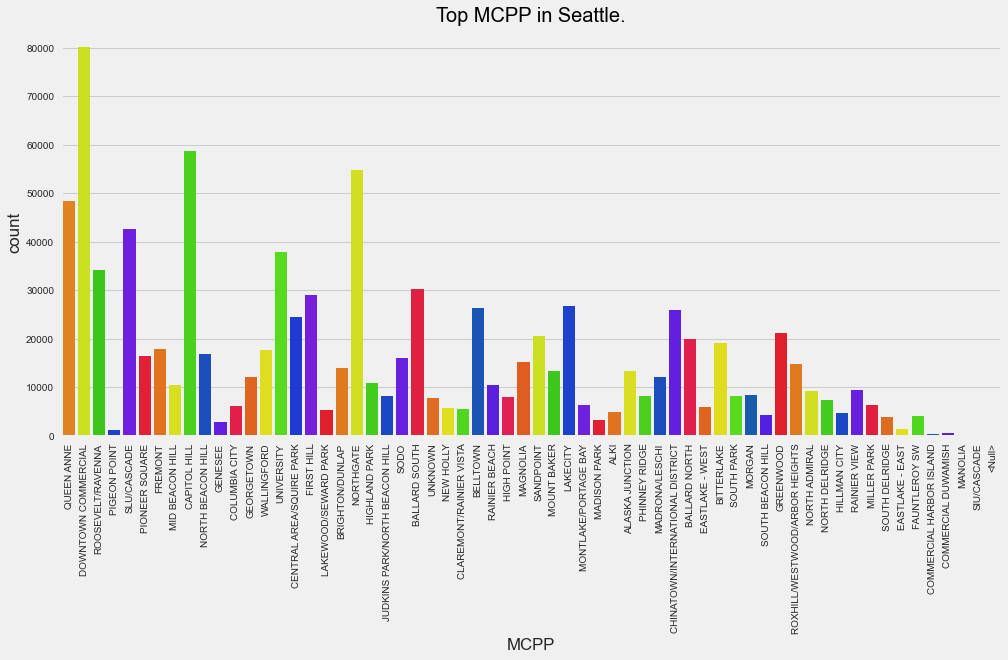

In [917]:
#Top MCPP :
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 15))
sns.countplot(df_new['MCPP'].sort_index(ascending=False), palette = 'prism',color=color)
plt.title('Top MCPP in Seattle.', fontweight = 30, fontsize = 20,color='Black')
plt.xticks(rotation = 90)
plt.savefig("Top MCPP.png")
plt.show()

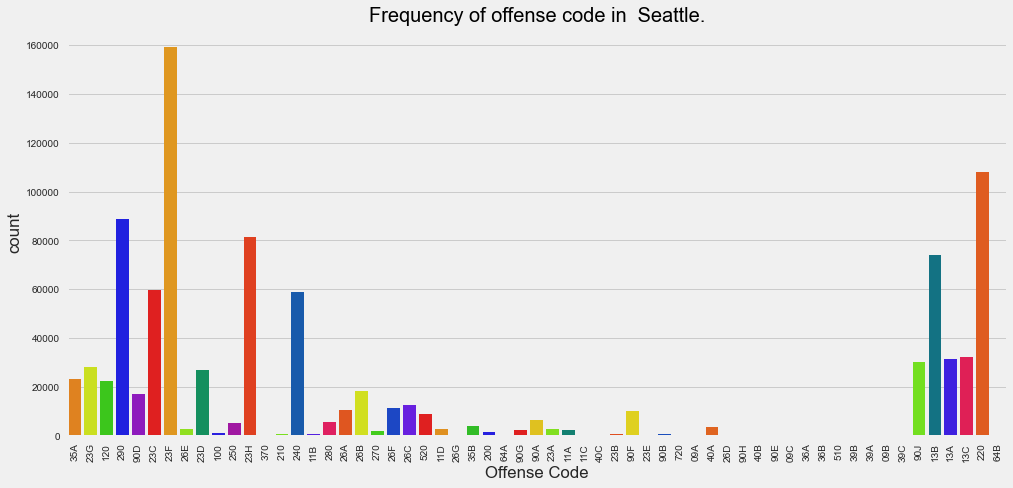

In [918]:
#Frequency of offense code::
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 15))
sns.countplot(df_new['Offense Code'].sort_index(ascending=True), palette = 'prism',color=color)
plt.title('Frequency of offense code in  Seattle.', fontweight = 30, fontsize = 20,color='Black')
plt.xticks(rotation = 90)
plt.savefig("Frequency of Offense code in Seattle.png")
plt.show()

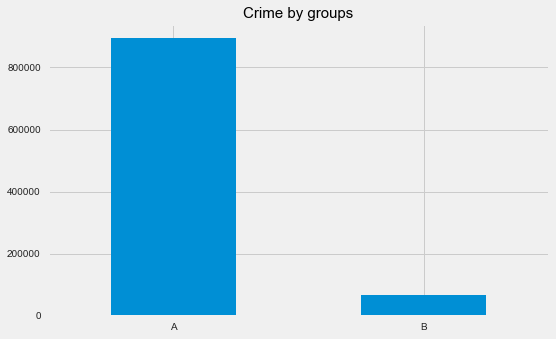

In [811]:
#crime by Groups:
plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use('fivethirtyeight')
color = plt.cm.spring(np.linspace(0, 1, 5))
df_new['Group A B'].value_counts().plot.bar()

plt.title('Crime by groups',fontsize =15,color ='Black')
plt.xticks(rotation = 360)
plt.savefig('Crime by groups.png')
plt.show()

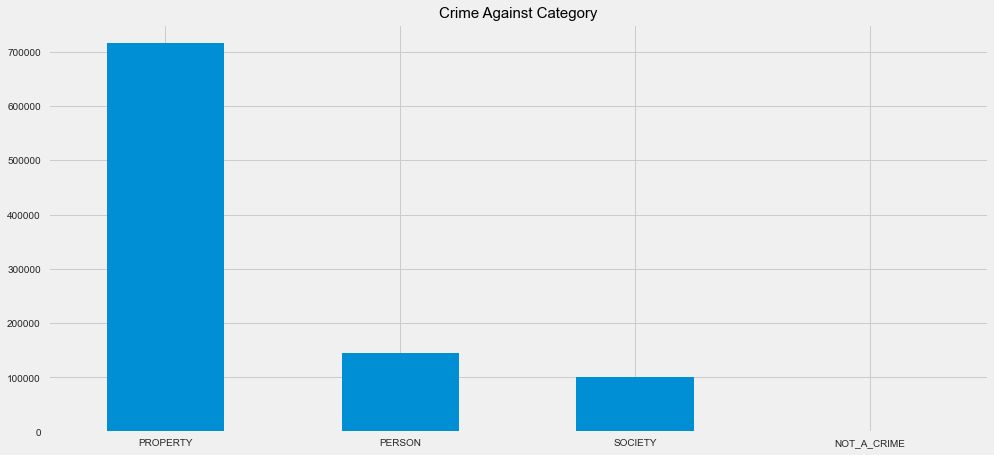

In [919]:
#plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use('fivethirtyeight')

color = plt.cm.spring(np.linspace(0, 1, 5))
df_new['Crime Against Category'].value_counts().plot.bar()

plt.title('Crime Against Category',fontsize =15,color ='Black')
plt.xticks(rotation = 360)
plt.savefig("Crime against Category.png")
plt.show()

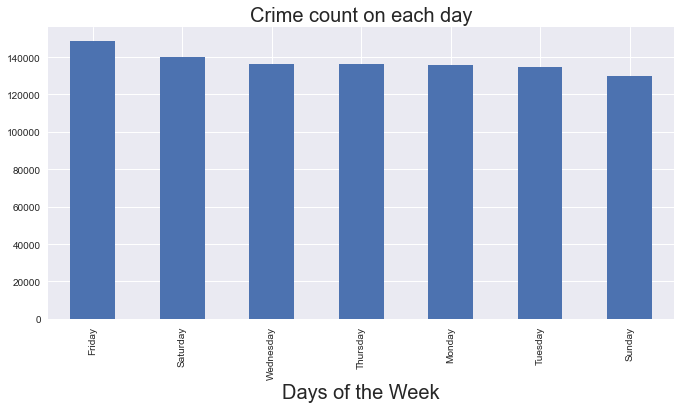

In [920]:
#Crime count by weekdays:
plt.style.use('seaborn')

color = plt.cm.cool(np.linspace(0, 1, 15))
df_new['day_of_week'].value_counts().head(15).plot.bar(figsize = (10, 5))
plt.xlabel("Days of the Week",fontsize=20)
plt.title('Crime count on each day',fontsize = 20)
plt.xticks(rotation = 90)
plt.savefig("Crime counts on each day.png")
plt.show()

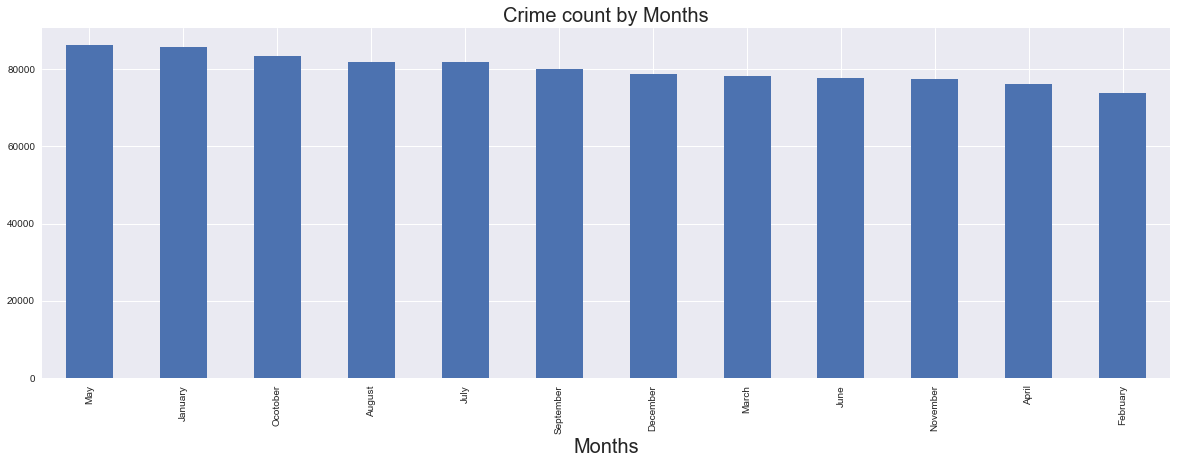

In [814]:
#Crime count by Month:
plt.style.use('seaborn')

color = plt.cm.cool(np.linspace(0, 1, 15))
df_new['month'].value_counts().sort_index(ascending=False).sort_values(ascending=False).head(15).plot.bar( figsize = (18, 6))
plt.xlabel("Months",fontsize=20)
plt.title('Crime count by Months',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

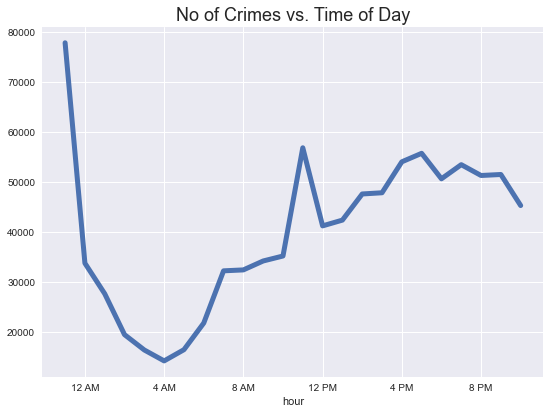

In [921]:
#Create line plot of crimes per hour
crime_per_hour = df_new.groupby("hour").count()
plt.title("No of Crimes vs. Time of Day",fontsize=18)
plt.xticks(np.arange(1,24,4),['12 AM','4 AM','8 AM','12 PM','4 PM','8 PM'])
crime_per_hour['Offense Parent Group'].plot(figsize=(8,6),label='Total',lw=5)
plt.savefig("No of Crimes vs Time of Day.png")

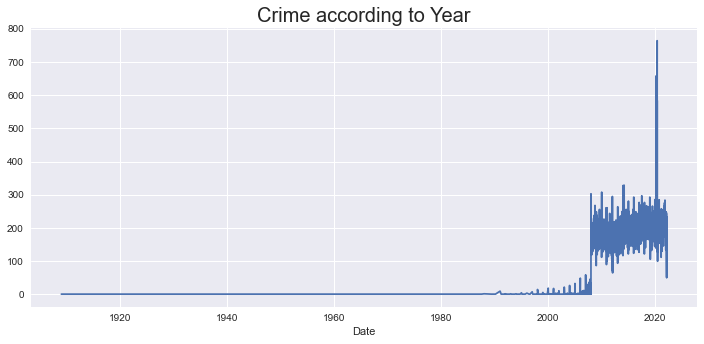

In [922]:
#Lets plot a line plot to plot crimes accoriding to date
plt.figure(figsize=(10,5))
df_new.groupby('Date').count()['Offense Parent Group'].plot();
plt.title('Crime according to Year', fontsize=20)
plt.tight_layout()
plt.savefig("Crime according to Year.png")

In [817]:
#Lets create a table with the highest no of crimes in Seattle.
crime_dates = df_new[df_new["year"] == 2020]
top_10_days = pd.DataFrame(crime_dates["dt_Year"].value_counts().head(10))
top_10_days.reset_index(inplace=True)
top_10_days.columns=['Date','Count']
top_10_days.head(10)

,Date,Count
0,2020-01-01,76060


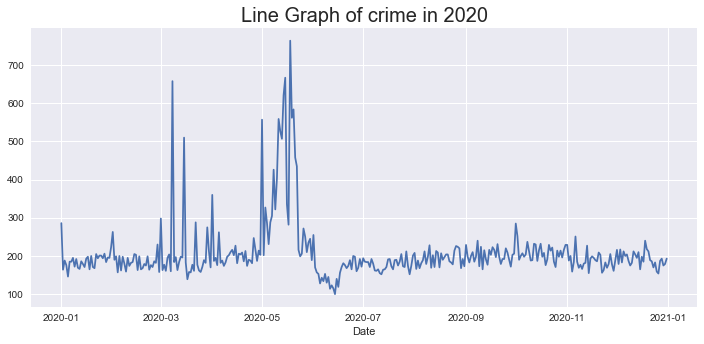

In [923]:
#Plot crimes according to days in 2020
crime_rate = df_new[df_new["year"] == 2020]
plt.figure(figsize=(10,5))
crime_rate.groupby('Date').count()['Offense Parent Group'].plot();
plt.title("Line Graph of crime in 2020",fontsize=20)
plt.tight_layout()
plt.savefig("Line Graph of Crime in 2020.png")

In [819]:
#counts by month:
crime_by_month = df_new[df_new["year"] ==2020]
top_10_counts =pd.DataFrame(crime_by_month["month"].value_counts().head(10))
top_10_counts.reset_index(inplace=True)
top_10_counts.columns = ['Month','Count']
top_10_counts.head(20)

,Month,Count
0,May,11673
1,March,6607
2,Ocotober,6519
3,April,6161
4,September,6036
5,August,6017
6,December,5962
7,January,5854
8,November,5608
9,July,5507


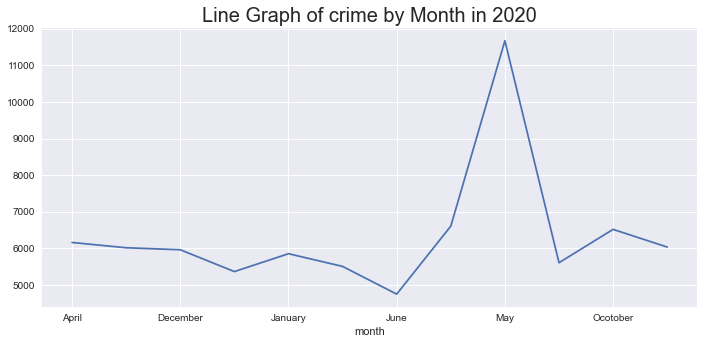

In [820]:
#Plot crimes according to month in 2020
crime_rate = df_new[df_new["year"] == 2020]

plt.figure(figsize=(10,5))
crime_rate.groupby('month').count()['Offense Parent Group'].plot();
plt.title("Line Graph of crime by Month in 2020",fontsize=20)
plt.tight_layout()

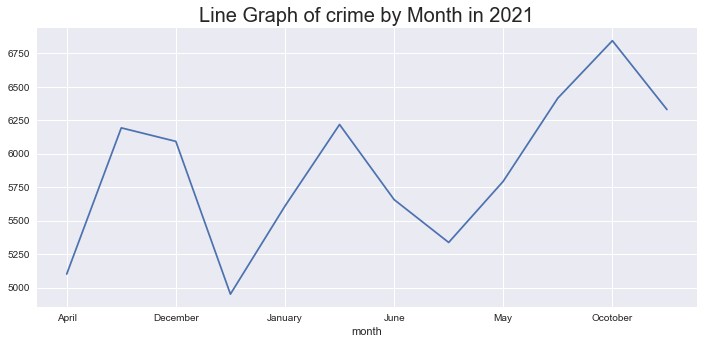

In [821]:
#Plot crimes according to days in 2021
crime_rate = df_new[df_new["year"] == 2021]

plt.figure(figsize=(10,5))
crime_rate.groupby('month').count()['Offense Parent Group'].plot();
plt.title("Line Graph of crime by Month in 2021",fontsize=20)
plt.tight_layout()

In [822]:
df_new.tail()

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,year,month,day_of_week,hour,Date,dt_Year
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,SW,F,F1,PIGEON POINT,-122.359028,47.565702,2013.0,July,Saturday,1.0,2013-07-13,2013-01-01
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,W,Q,Q3,QUEEN ANNE,-122.355386,47.626251,2013.0,June,Wednesday,11.0,2013-06-26,2013-01-01
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,23C,N,U,U1,ROOSEVELT/RAVENNA,-122.317464,47.681894,2012.0,February,Tuesday,15.0,2012-02-14,2012-01-01
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,23C,W,M,M3,DOWNTOWN COMMERCIAL,-122.335018,47.610909,2010.0,September,Sunday,16.0,2010-09-19,2010-01-01
962144,2010-064656,7686420892,02/25/2010 06:00:00 PM,02/26/2010 07:54:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,W,Q,Q2,QUEEN ANNE,-122.355546,47.643681,2010.0,February,Thursday,18.0,2010-02-25,2010-01-01


In [823]:
#let's keep only the cloumns we need:
df_crime = df_new.drop(columns =['Report Number','Crime Against Category','Beat','Offense ID','Offense Start DateTime','Report DateTime','Group A B','Offense Code','Precinct','Sector','MCPP','Longitude','Latitude','hour'])
df_crime

,Offense Parent Group,year,month,day_of_week,Date,dt_Year
0,DRUG/NARCOTIC OFFENSES,2020.0,February,Wednesday,2020-02-05,2020-01-01
1,LARCENY-THEFT,2020.0,February,Monday,2020-02-03,2020-01-01
2,ROBBERY,2020.0,February,Sunday,2020-02-02,2020-01-01
3,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,2020.0,February,Wednesday,2020-02-05,2020-01-01
4,DRIVING UNDER THE INFLUENCE,2020.0,February,Wednesday,2020-02-05,2020-01-01
...,...,...,...,...,...,...
962140,MOTOR VEHICLE THEFT,2013.0,July,Saturday,2013-07-13,2013-01-01
962141,MOTOR VEHICLE THEFT,2013.0,June,Wednesday,2013-06-26,2013-01-01
962142,LARCENY-THEFT,2012.0,February,Tuesday,2012-02-14,2012-01-01
962143,LARCENY-THEFT,2010.0,September,Sunday,2010-09-19,2010-01-01


In [826]:
#checking the nulls.
df_crime.isna().sum()

Offense Parent Group    0
year                    0
month                   0
day_of_week             0
Date                    0
dt_Year                 0
dtype: int64

In [827]:
df_crime= df_crime.dropna(axis=0, how='any')
df_crime

,Offense Parent Group,year,month,day_of_week,Date,dt_Year
0,DRUG/NARCOTIC OFFENSES,2020.0,February,Wednesday,2020-02-05,2020-01-01
1,LARCENY-THEFT,2020.0,February,Monday,2020-02-03,2020-01-01
2,ROBBERY,2020.0,February,Sunday,2020-02-02,2020-01-01
3,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,2020.0,February,Wednesday,2020-02-05,2020-01-01
4,DRIVING UNDER THE INFLUENCE,2020.0,February,Wednesday,2020-02-05,2020-01-01
...,...,...,...,...,...,...
962140,MOTOR VEHICLE THEFT,2013.0,July,Saturday,2013-07-13,2013-01-01
962141,MOTOR VEHICLE THEFT,2013.0,June,Wednesday,2013-06-26,2013-01-01
962142,LARCENY-THEFT,2012.0,February,Tuesday,2012-02-14,2012-01-01
962143,LARCENY-THEFT,2010.0,September,Sunday,2010-09-19,2010-01-01


In [829]:
#Converting float year to int:
df_crime.year = df_crime.year.astype(int)

In [831]:
df_crime['offense_counts'] = df_crime['Offense Parent Group']

In [832]:
crime_rate

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,year,month,day_of_week,hour,Date,dt_Year
855961,2021-002024,19260363069,01/03/2021 07:50:00 PM,01/03/2021 09:17:54 PM,A,PROPERTY,STOLEN PROPERTY OFFENSES,280,N,L,L3,LAKECITY,-122.291503,47.715506,2021.0,January,Sunday,19.0,2021-01-03,2021-01-01
857680,2021-032356,20409706356,02/07/2021 06:38:00 PM,02/07/2021 07:37:11 PM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,N,N,N3,GREENWOOD,-122.344694,47.705051,2021.0,February,Sunday,18.0,2021-02-07,2021-01-01
857826,2021-045588,21421289970,02/15/2021 11:59:00 PM,02/23/2021 05:27:31 PM,A,PROPERTY,MOTOR VEHICLE THEFT,240,SW,W,W1,ALKI,-122.411306,47.578933,2021.0,February,Monday,23.0,2021-02-15,2021-01-01
858055,2021-039062,20881878784,02/16/2021 07:46:00 AM,02/16/2021 09:54:58 AM,A,PROPERTY,STOLEN PROPERTY OFFENSES,280,SW,F,F1,NORTH DELRIDGE,-122.364295,47.554506,2021.0,February,Tuesday,7.0,2021-02-16,2021-01-01
858273,2021-054304,21681081028,03/05/2021 04:16:00 AM,03/05/2021 05:05:24 AM,A,PROPERTY,STOLEN PROPERTY OFFENSES,280,S,O,O2,SODO,-122.322712,47.569829,2021.0,March,Friday,4.0,2021-03-05,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962123,2021-210204,26937951561,08/13/2021 08:28:00 PM,08/13/2021 09:12:43 PM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,S,O,O2,GEORGETOWN,0.000000,0.000000,2021.0,August,Friday,20.0,2021-08-13,2021-01-01
962124,2021-210204,26938167902,08/13/2021 08:28:00 PM,08/13/2021 09:12:43 PM,A,SOCIETY,WEAPON LAW VIOLATIONS,520,S,O,O2,GEORGETOWN,0.000000,0.000000,2021.0,August,Friday,20.0,2021-08-13,2021-01-01
962125,2021-209603,31723041119,08/13/2021 09:11:00 AM,08/13/2021 10:23:44 AM,A,PERSON,ASSAULT OFFENSES,13B,S,R,R3,COLUMBIA CITY,-122.282101,47.557841,2021.0,August,Friday,9.0,2021-08-13,2021-01-01
962126,2021-206747,31721990307,08/10/2021 03:05:00 PM,08/10/2021 06:24:31 PM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,S,R,R3,GENESEE,-122.278254,47.564089,2021.0,August,Tuesday,15.0,2021-08-10,2021-01-01


In [834]:
#grouping by Date
crime_rate.groupby('Date').count()['Offense Parent Group']

Date
2021-01-01    238
2021-01-02    164
2021-01-03    179
2021-01-04    203
2021-01-05    158
             ... 
2021-12-27    134
2021-12-28    139
2021-12-29    162
2021-12-30    178
2021-12-31    190
Name: Offense Parent Group, Length: 365, dtype: int64

In [835]:
crime_rate.groupby('Date').count()['Offense Parent Group']

Date
2021-01-01    238
2021-01-02    164
2021-01-03    179
2021-01-04    203
2021-01-05    158
             ... 
2021-12-27    134
2021-12-28    139
2021-12-29    162
2021-12-30    178
2021-12-31    190
Name: Offense Parent Group, Length: 365, dtype: int64

In [836]:
df_crime_new =df_crime.groupby('Date').count()['Offense Parent Group'].to_frame(name='count').reset_index()

In [837]:
df_crime_new

,Date,count
0,1908-12-13,1
1,1915-12-14,1
2,1920-09-23,1
3,1929-06-06,1
4,1953-04-20,1
...,...,...
5860,2022-02-23,162
5861,2022-02-24,145
5862,2022-02-25,145
5863,2022-02-26,111


### Feature Engineering
Prepping our data for modelling.

In [838]:
#Prepping our final dataframe.
finalDataFrame = pd.DataFrame()
years =[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

for year in years:
    #print(year)
    crime_rate = df_crime[df_crime["year"]== year]
    #monthly_count = pd.concat([monthly_count, crime_rate.groupby(['year', 'month']).count()['Offense Parent Group']])
    df2 = crime_rate.groupby(['year', 'month']).count()['Offense Parent Group'].to_frame(name='count').reset_index()
    if finalDataFrame.empty:
        finalDataFrame = df2
    else:
        finalDataFrame = finalDataFrame.append(df2, ignore_index=True)
print(finalDataFrame)

     year      month  count
0    2010      April   5199
1    2010     August   5292
2    2010   December   4992
3    2010   February   4680
4    2010    January   6059
..    ...        ...    ...
139  2021      March   5338
140  2021        May   5795
141  2021   November   6416
142  2021   Ocotober   6845
143  2021  September   6331

[144 rows x 3 columns]


In [839]:
#Our finaldataframe
finalDataFrame

,year,month,count
0,2010,April,5199
1,2010,August,5292
2,2010,December,4992
3,2010,February,4680
4,2010,January,6059
...,...,...,...
139,2021,March,5338
140,2021,May,5795
141,2021,November,6416
142,2021,Ocotober,6845


In [840]:
#max value in finalDataFrame
finalDataFrame.max()

year          2021
month    September
count        11673
dtype: object

In [842]:
#Mapping Months to numbers.
d = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'Ocotober':'10', 'November':'11', 'December':'12'}
''
finalDataFrame['yearMonth'] = pd.to_datetime(finalDataFrame['year'].astype(str) +"-"+ finalDataFrame['month'].map(d)+"-01")
finalDataFrame

,year,month,count,yearMonth
0,2010,April,5199,2010-04-01
1,2010,August,5292,2010-08-01
2,2010,December,4992,2010-12-01
3,2010,February,4680,2010-02-01
4,2010,January,6059,2010-01-01
...,...,...,...,...
139,2021,March,5338,2021-03-01
140,2021,May,5795,2021-05-01
141,2021,November,6416,2021-11-01
142,2021,Ocotober,6845,2021-10-01


In [843]:
#Creating our final Dtataframe and set_index as Year/Month.
finalDataFrame['Year/Month'] = pd.to_datetime(finalDataFrame['yearMonth'], format='%y-%m-%d')
finalDataFrame.set_index('Year/Month', inplace=True)
finalDataFrame = finalDataFrame.drop(columns=['year','month','yearMonth'])
finalDataFrame

,count
Year/Month,
2010-04-01,5199
2010-08-01,5292
2010-12-01,4992
2010-02-01,4680
2010-01-01,6059
...,...
2021-03-01,5338
2021-05-01,5795
2021-11-01,6416


In [844]:
#our final dataframe:
finalDataFrame= finalDataFrame.sort_values(by="Year/Month")
finalDataFrame

,count
Year/Month,
2010-01-01,6059
2010-02-01,4680
2010-03-01,5116
2010-04-01,5199
2010-05-01,5526
...,...
2021-08-01,6194
2021-09-01,6331
2021-10-01,6845


In [845]:
finalDataFrame_monthly = finalDataFrame.resample('Q')
month_mean= finalDataFrame_monthly.mean()

In [846]:
month_mean.head()

,count
Year/Month,
2010-03-31,5285.000000
2010-06-30,5386.666667
2010-09-30,5258.333333
2010-12-31,5152.666667
2011-03-31,4658.333333


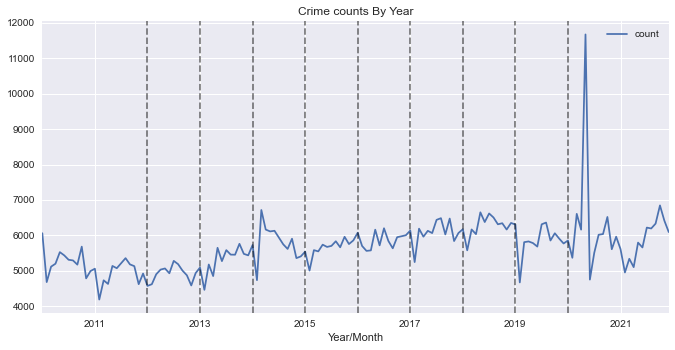

In [847]:
# Create a time series line plot for finalDataFrame
finalDataFrame.plot(figsize = (10,5))
for year in range(2012,2021):
    plt.axvline(datetime(year,1,1),linestyle='--',color ='k',alpha= 0.5)
plt.title("Crime counts By Year")
plt.show()

### Grouping and Visualizing time series data

In [848]:
#let's group the data by year and create a line plot for each year for direct comparison.
year_groups = finalDataFrame.groupby(pd.Grouper(freq ='A'))

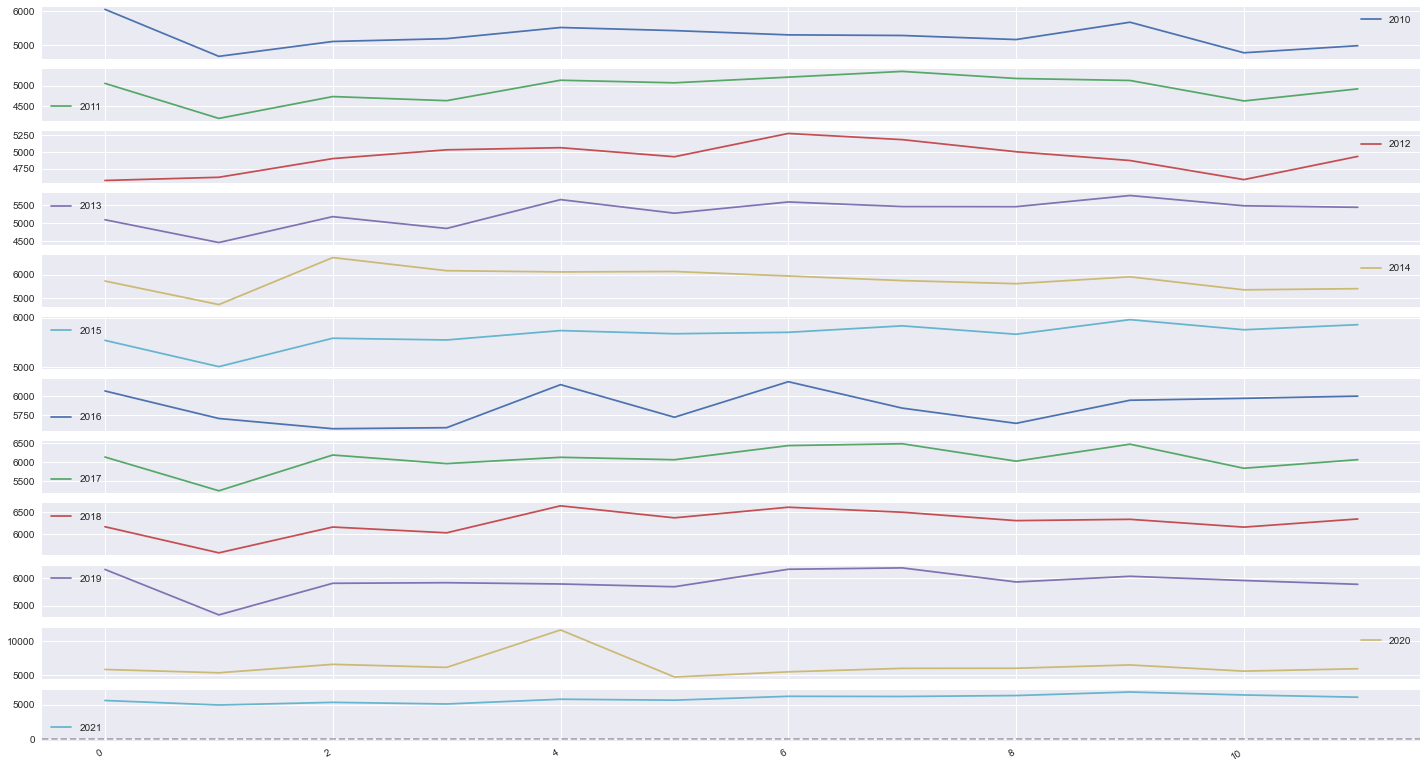

In [849]:
# Create a new DataFrame and store yearly values in columns  
crime_annual = pd.DataFrame() 

for yr, group in year_groups:
    crime_annual[yr.year] = group.values.ravel()

# Plot the yearly groups as subplots
crime_annual.plot(figsize = (22,15), subplots=True, legend=True)
plt.axhline(0,linestyle='--',color ='k',alpha= 0.3)
plt.show()

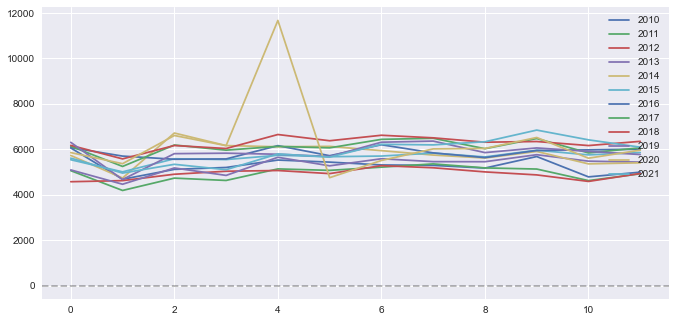

In [850]:
# Plot all years on the same graph
crime_annual.plot(figsize = (10,5), subplots=False, legend=True)
plt.axhline(0,linestyle='--',color ='k',alpha= 0.3)
plt.show()

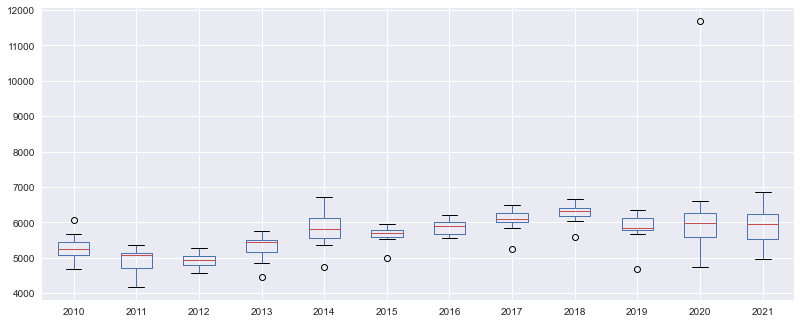

In [851]:
# Generate a box and whiskers plot for finalDataFrame
crime_annual.boxplot(figsize = (12,5))
plt.show()

### Step 1: Visualizing the time series:

Seasonal Decomposition

Trends - What is the overall trend in the data?

Seasonality - How does crimes fluctuate between seasons?

Residuals - When removing trends and seasonality what does the data look like?

### Time Series Decomposition
Time series decomposition is a mathematical procedure that transforms a time series into multiple different time  series. The original time series is often split into three component series:
* Seasonal: 
* Trend: 
* Random: 

#### Since the time series  doesn't seems to have a linear trend we will used model as 'Multiplicable.
By visualization, if the time series is having exponential growth or decrement with time then the time series can be considered as the multiplicative time series. 

Source: [https://towardsdatascience.com/time-series-from-scratch-decomposing-time-series-data-7b7ad0c30fe7]

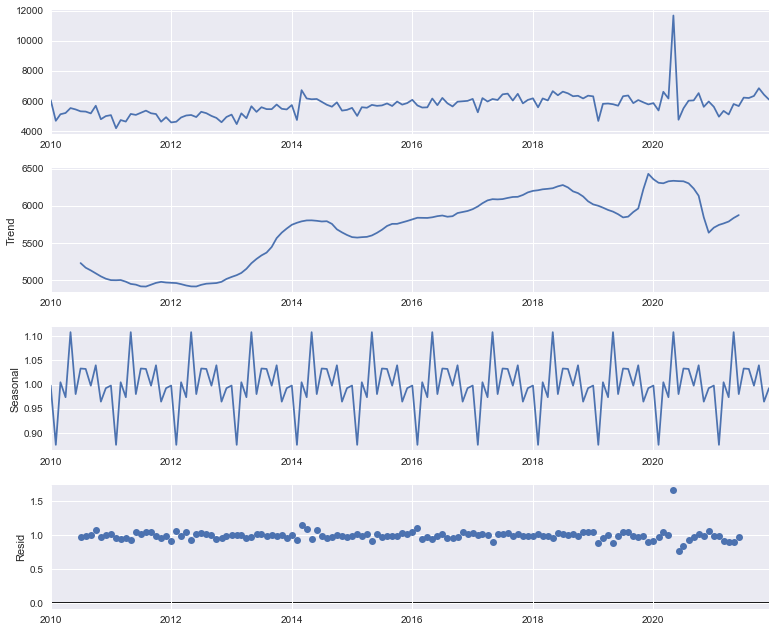

In [853]:
#Seasonal decomposing the series to see trend, seasonality,and residuals.
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = 11, 9
decomposition = seasonal_decompose(finalDataFrame,model='multiplicable')
decomposition.plot()
plt.show()

Trends - An almost linear incline in the number of monthly violent crimes,with declining rate for some months.

Seasonality - It looks like there correlation with seasons with a peak in the summer months and a trough in the winter months

Residuals - This mostly looks like noise, however we can improve on this,

### Create a stationarity check function:

* Augmented Dickey-Fuller (ADF) Test

ADF test is used to determine the presence of unit root in the series, and hence helps in understanding if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis(Ho): The series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis(HA): The series has no unit root, meaning it is stationary. It does not have time-dependent structure.

Source: [https://machinelearningmastery.com/time-series-data-stationary-python/]

In [854]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test.
#When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary

def stationarity_check(series):
    # Calculate rolling statistics
    roll_mean = series.rolling(window=8, center=False).mean()
    roll_std = series.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(series,autolag='AIC')
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(10,5))
    plt.xlabel("Years/Month")
    plt.ylabel("Count of Crimes")
    plt.plot(series, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    #print(dfoutput)
    
    return dfoutput

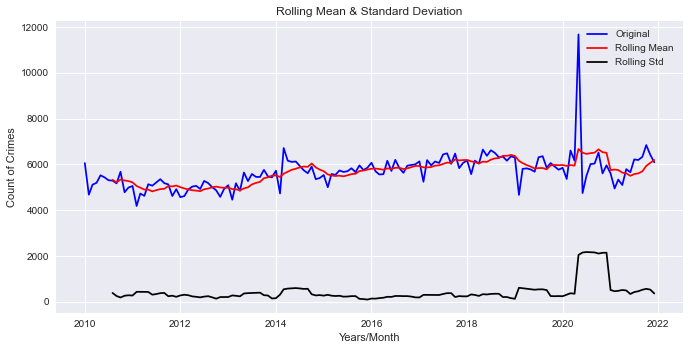

Results of Dickey-Fuller Test: 



Test Statistic                  -2.529663
p-value                          0.108423
#Lags Used                       4.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64

In [855]:
stationarity_check(finalDataFrame)

Unsurprisingly the data fails the augmeneted Dickey-Fuller Test as T-statisticis greater than Critical value,hence not being able to reject the null hypothesis(T-Statistic > Critical value 1% ),which concludes:
* series is non-stationary.

### Step 2: Make Time Series stationary.

In [856]:
#Let's try to normalise data by getting average and standard deviation.
avg, dev = finalDataFrame.mean() ,finalDataFrame.std()

In [857]:
finalDataFrame1 =(finalDataFrame - avg)/dev

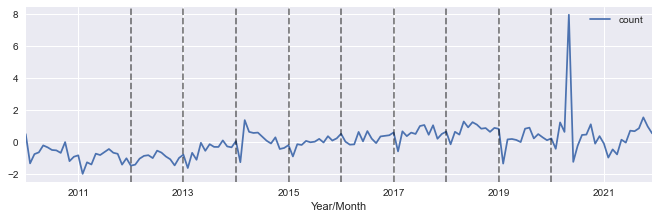

In [858]:
#plotting the DataFrame1:
finalDataFrame1.plot(figsize = (10,3))
for year in range(2012,2021):
    plt.axvline(datetime(year,1,1),linestyle='--',color ='k',alpha= 0.5)
plt.show()

In [863]:
finalDataFrame1.head()

,count
Year/Month,
2010-01-01,0.502006
2010-02-01,-1.333264
2010-03-01,-0.753004
2010-04-01,-0.642542
2010-05-01,-0.207348


This doesn't show any change compared tot he original plot.Let's try another method.

In [864]:
#Let's try grouping
#groupby_index = finalDataFrame.groupby(finalDataFrame.index.year).std()

In [865]:
#groupby_index

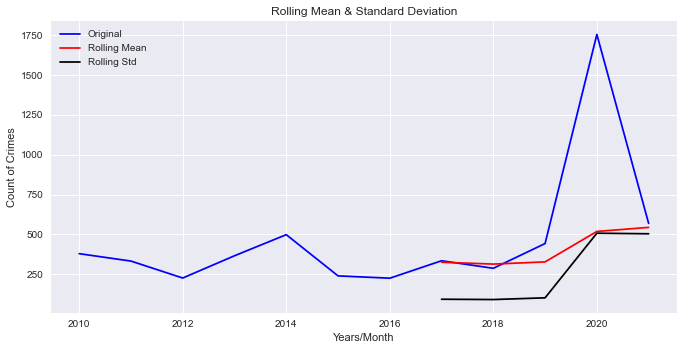

Results of Dickey-Fuller Test: 



Test Statistic                -4.087169
p-value                        0.001017
#Lags Used                     4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64

In [866]:
stationarity_check(groupby_index['count'])

T-statistic > Critical Value, hence unable to reject the null hypothesis.Fails ADF test.Hence,is non-stationary.

#### Method 2:
A very common way to make a time series stationary is differencing: from each value in our time series, we subtract the previous value.

In [867]:
#Let's create afunction to check if our series is stationary by differencing which is done by from each value in our time series, we subtract the previous value.
def difference_test(series, max_d):
    results =[]
    for index in range(max_d):
        adfuller_result=  stationarity_check(series)
        series = series.diff().dropna()
        if adfuller_result[1] <= 0.05:
            series_stationary = True
        else:
            series_stationary =False
        results.append((index,adfuller_result[1],series_stationary))
    results_df = pd.DataFrame(results,columns=['diff','p-value','series_stationary'])  
    return results_df

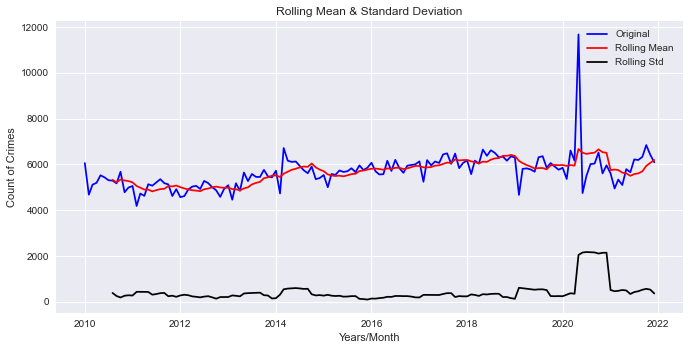

Results of Dickey-Fuller Test: 



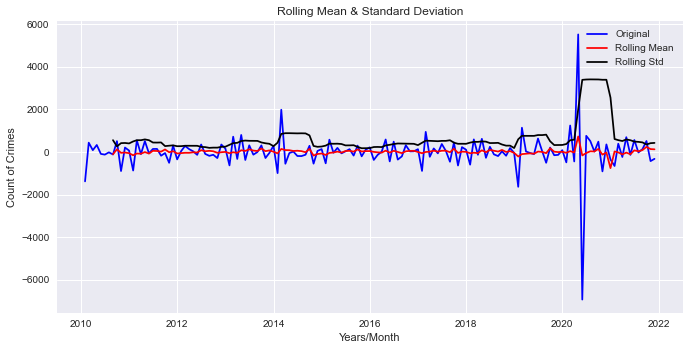

Results of Dickey-Fuller Test: 



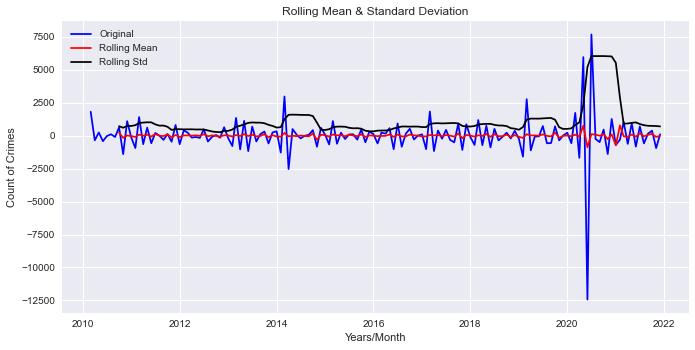

Results of Dickey-Fuller Test: 



,diff,p-value,series_stationary
0,0,1.084228e-01,False
1,1,3.569738e-17,True
2,2,1.457723e-09,True


In [868]:
difference_test(finalDataFrame['count'],3)

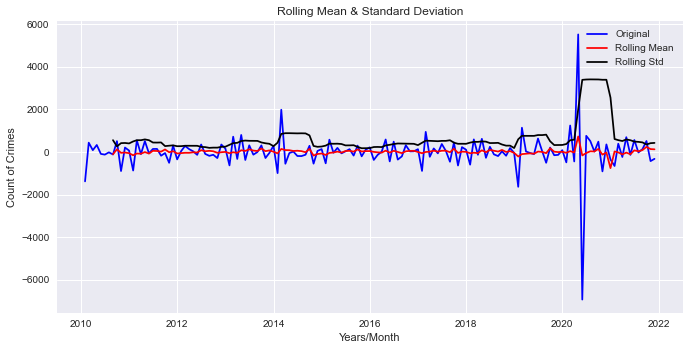

Results of Dickey-Fuller Test: 



Test Statistic                -9.890444e+00
p-value                        3.569738e-17
#Lags Used                     3.000000e+00
Number of Observations Used    1.390000e+02
Critical Value (1%)           -3.478294e+00
Critical Value (5%)           -2.882568e+00
Critical Value (10%)          -2.577983e+00
dtype: float64

In [869]:
#Lets see the results of dickey fuller test of differencing by 1:
stationarity_check(finalDataFrame['count'].diff().dropna())

Above results of differencing once shows p-value <0.05, and Tstatistics < Critical Value,which rejects the null hypothesis and confirms our alternate hypothesis that time series is stationary.

#### Results: Differencing by 1& 2 makes our time series stationary.

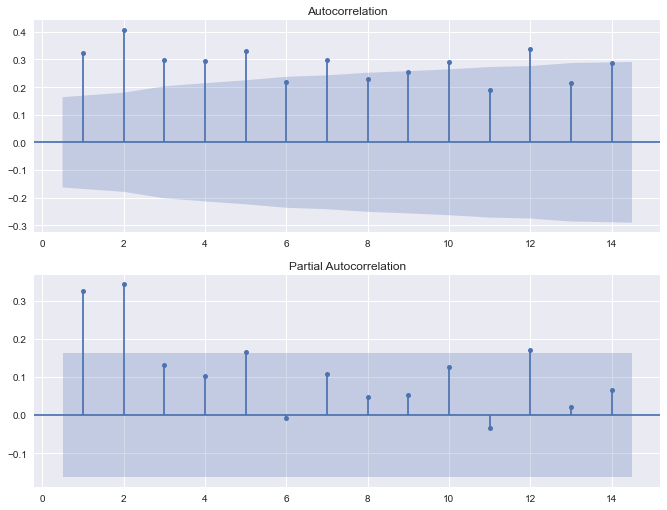

In [870]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))
 
# Plot the ACF of df_store_2_item_28_timeon ax1
plot_acf(finalDataFrame,lags=14, zero=False, ax=ax1)

# Plot the PACF of df_store_2_item_28_timeon ax2
plot_pacf(finalDataFrame,lags=14, zero=False, ax=ax2)

plt.show()

Estimating p,q: From the above ACF and PACF plot we can identify p=1,q=1.

In [872]:
#Fitting our Arima model: with d=1
model = ARIMA(finalDataFrame, order=(1,1,1))
results = model.fit()
# statistics of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1128.678
Method:                       css-mle   S.D. of innovations            643.720
Date:                Wed, 09 Mar 2022   AIC                           2265.357
Time:                        14:11:03   BIC                           2277.208
Sample:                    02-01-2010   HQIC                          2270.172
                         - 12-01-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4761      4.749      1.574      0.115      -1.831      16.783
ar.L1.D.count     0.0038      0.099      0.039      0.969      -0.190       0.198
ma.L1.D.count    -0.9230      0.057    -16.057      0.000      -1.036      -0.810
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          261.0163           +0.0000j          261.0163            0.0000
MA.1            1.0835           +0.0000j            1.0835            0.0000
-----------------------------------------------------------------------------
"""

Let's find best P,q for our model with help of aic,bic scores.

In [875]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-6
for p in range(7):
  # Loop over q values from 0-6
    for q in range(7):
       # create and fit ARMA(p,q) model
        model = SARIMAX(finalDataFrame, order=(p,1,q)) #because adf test showed that d=1
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))

In [876]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
order_df.sort_values('AIC')

,p,q,AIC,BIC
1,0,1,2260.800696,2266.726385
15,2,1,2261.666461,2273.517839
3,0,3,2261.725954,2273.577332
18,2,4,2262.512984,2283.252897
8,1,1,2262.767814,2271.656348
2,0,2,2262.776367,2271.664901
22,3,1,2263.662483,2278.476706
25,3,4,2263.678209,2287.380966
19,2,5,2263.692639,2287.395396
10,1,3,2263.694717,2278.508940


In [877]:
# Print order_df in order of increasing BIC
order_df.sort_values('BIC')

,p,q,AIC,BIC
1,0,1,2260.800696,2266.726385
8,1,1,2262.767814,2271.656348
2,0,2,2262.776367,2271.664901
15,2,1,2261.666461,2273.517839
3,0,3,2261.725954,2273.577332
9,1,2,2264.126725,2275.978104
22,3,1,2263.662483,2278.476706
10,1,3,2263.694717,2278.508940
4,0,4,2263.705925,2278.520148
16,2,2,2264.427459,2279.241683


Both AIC and BIC agree that the best model in this case should be ARIMA(0,1,1).

### Step 3: Implementing Models:
### BaseLine Model:
* For our baseline Model we will be implementing ARIMA:
*Find optimal parameters for ARIMA

## About ARIMA model

* ARIMA stands for Autoregressive Integreted Moving Average
* ARIMA models are denoted with the notation ARIMA(p, d, q)

These three parameters account for seasonality, trend, and noise in data
ARIMA Model
ARIMA as a feature:

* Autoregressive Integrated Moving Average (ARIMA) — This was one of the most popular techniques for predicting future values of time series data (in the pre-neural networks ages). Let’s add it and see if it comes off as an important predictive feature.

ARIMA is a technique for predicting time series data. We will show how to use it, and all though ARIMA will not serve as our final prediction, we will use it as a technique to denoise the stock a little and to (possibly) extract some new patters or features.

ARIMA is an acronym. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

#### The parameters of the ARIMA model are defined as follows:

    p: The number of lag observations included in the model, also called the lag order.

    d: The number of times that the raw observations are differenced, also called the degree of differencing.

    q: The size of the moving average window, also called the order of moving average.

#### STEPS FOR ARIMA

1. Define the model by calling ARIMA() and passing in the p, d, and q parameters.

2. The model is prepared on the training data by calling the fit() function.

3. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

### Metrics Choosen to compare Models:
* MAPE(Mean ABsolute Percentage Error)
* MAE(Mean Absolute Error)


#### Auto Regressive Model
* The autocorrelation function is a function that represents autocorrelation of a time series as a function of the time lag.
* Creating an autocorrelation function for our "finalDataFrame", we have the lag on the x-axis and the correlation value for each respective lag value on the y-axis.


In [880]:
#Baseline Model.
arima_model_01 = ARIMA(finalDataFrame, order=(0,1,1))
# fit model
arima_results = arima_model_01.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae)

#Print results summary
arima_results.summary()

MAE: 360.750


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                  143
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1128.679
Method:                       css-mle   S.D. of innovations            643.740
Date:                Wed, 09 Mar 2022   AIC                           2263.358
Time:                        14:13:37   BIC                           2272.247
Sample:                    02-01-2010   HQIC                          2266.970
                         - 12-01-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4514      4.746      1.570      0.116      -1.850      16.753
ma.L1.D.count    -0.9218      0.049    -18.685      0.000      -1.018      -0.825
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0848           +0.0000j            1.0848            0.0000
-----------------------------------------------------------------------------
"""

In [881]:
#Baseline Model without differencing.
arima_model_01 = ARIMA(finalDataFrame, order=(0,0,1))
# fit model
arima_results = arima_model_01.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae)

#Print results summary
arima_results.summary()

MAE: 456.760


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  count   No. Observations:                  144
Model:                     ARMA(0, 1)   Log Likelihood               -1152.701
Method:                       css-mle   S.D. of innovations            724.719
Date:                Wed, 09 Mar 2022   AIC                           2311.401
Time:                        14:13:39   BIC                           2320.311
Sample:                    01-01-2010   HQIC                          2315.021
                         - 12-01-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5683.1083     72.426     78.468      0.000    5541.157    5825.060
ma.L1.count     0.2006      0.065      3.095      0.002       0.074       0.328
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -4.9850           +0.0000j            4.9850            0.5000
-----------------------------------------------------------------------------
"""

In [882]:
finalDataFrame.describe()

,count
count,144.000000
mean,5681.798611
std,751.388203
min,4187.000000
25%,5195.750000
50%,5691.500000
75%,6068.000000
max,11673.000000


## Autocorrelation plots : 
Are a commonly-used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags. If random, such autocorrelations should be near zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly non-zero.Source [https://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm]

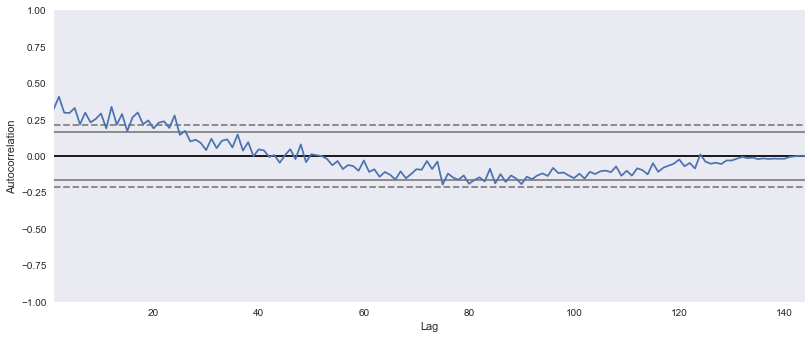

In [884]:
#plotting the autocorelation_plot
#from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(finalDataFrame['count']);

In [885]:
finalDataFrame.head()

,count
Year/Month,
2010-01-01,6059
2010-02-01,4680
2010-03-01,5116
2010-04-01,5199
2010-05-01,5526


In [887]:
#Functions to implement ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from datetime import timedelta
from numpy import sqrt 

def evaluate_arima_models(data,order,forecast_periods):
    """ This function evaluates arima models.
    Args: 
        data: timseries
        order: order of the model
        forecast_periods = number of periods
    Return:
        returns summary of evaluated model, and MAE,MAPE.
    """
    
    #preparing training dataset 
    val = int(len(data)* 0.1)
    size = int(len(data) * 0.7)
    validation_set = data[0:val]
    train,test = data[val:size],data[size:len(data)]
   
    data_series =[x for x in train]
    
    #making predictions
    arima_results =[]
    predictions = []
    for i in range(len(test)):
        model = ARIMA(data_series,order = order)
        arima_results = model.fit(dis=0)
        yhat = arima_results.forecast()[0]
        predictions.append(yhat)
        data_series.append(test[i])
    
    #Calculating future_forecast.
    future_forecast = model_fit.forecast(forecast_periods)[0]
    future_dates = [test.index[-1] + timedelta(i*365/12) for i in range(1,forecast_periods+1)]
    test_dates = test.index 
    
    # creates pandas series with datetime index for the predictions and forecast values
    forecast = pd.Series(future_forecast, index=future_dates)
    predictions = pd.Series(predictions, index=test_dates)
    
    # Plotting predictions with test data:
    fig = plt.figure(figsize=(10,5))
    plt.plot(test, label='Test')
    plt.plot(predictions ,linestyle="--" ,label = 'Predicted')
    plt.legend(loc='best')
    plt.show()
    #plotting predicted with forecast
    fig = plt.figure(figsize=(10,5))
    plt.plot(test , label = 'Test')
    plt.plot(forecast,linestyle="--", label='Forecast')
    plt.legend(loc='best')
    plt.show()
   
    print("-----------------------------------------------------")
    print("Values for test",test[:10])
    print("----------------------------------------------------")
    print("Values for Predictions",predictions[:10])
    print("----------------------------------------------------")
    
    #calculate the mean absolute error from residuals
    mae = np.mean(np.abs(arima_results.resid))
    print('The Mean absolute Error of our forecasts is {}'.format(round(mae, 4)))
    
    MAPE= mean_absolute_percentage_error(test, predictions)
    print('The Mean absolute Percentage Error of our forecasts is {}'.format(round(MAPE, 4))) 
      
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    #Normalized rmse values
    norm_rmse = rmse/(data.max()-data.min())
    print('The Normalized RMSE value is {}'.format(round(norm_rmse, 4)))
    return arima_results

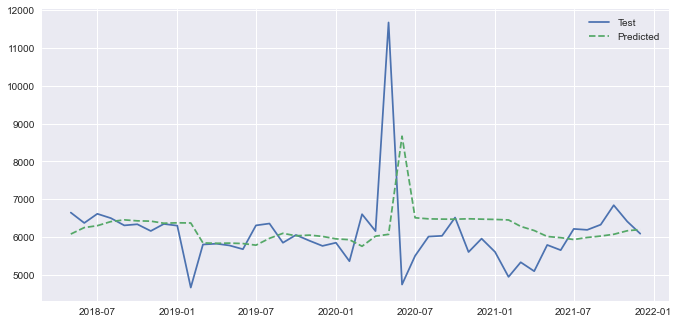

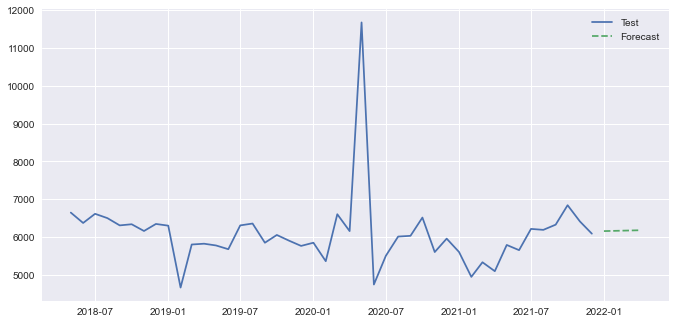

-----------------------------------------------------
Values for test Year/Month
2018-05-01    6650
2018-06-01    6376
2018-07-01    6618
2018-08-01    6504
2018-09-01    6312
2018-10-01    6342
2018-11-01    6164
2018-12-01    6350
2019-01-01    6305
2019-02-01    4670
Name: count, dtype: int64
----------------------------------------------------
Values for Predictions Year/Month
2018-05-01    [6083.172686061763]
2018-06-01     [6254.36869765279]
2018-07-01    [6303.997666549675]
2018-08-01    [6411.791518938847]
2018-09-01    [6457.853159051223]
2018-10-01    [6431.940019241249]
2018-11-01    [6423.823310875957]
2018-12-01    [6369.230409781989]
2019-01-01    [6380.059268233501]
2019-02-01     [6375.32347926553]
dtype: object
----------------------------------------------------
The Mean absolute Error of our forecasts is 361.786
The Mean absolute Percentage Error of our forecasts is 0.0983
The Normalized RMSE value is 0.1565
                             ARIMA Model Results           

In [888]:
#for order of p,d,q
#ARIMA(1) for order of 0,1,1
order=(0,1,1)
periods=4
arima_results1= evaluate_arima_models(finalDataFrame['count'],order,periods)
print(arima_results1.summary())

### GridSearch ARIMA hyperparamters.

In [889]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_models(dataset, order,periods)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


Since, this is doing a gridSearch it takes a little longer time to execute.

In [890]:
#p_values = [0, 1, 2, 4, 6, 8, 10]
#d_values = range(0, 3)
#q_values = range(0, 3)
#evaluate_models(finalDataFrame.values, p_values, d_values, q_values)

#### Fitting ARIMA using combinations of p,d,q is a tedious task.To reduce this time we will make use of an open source  Python library: PMDArima

### Automated Model Selection:
PMDArima is an open-source Python library that is used for time series forecasting and also helps in creating time series plots. It is easy to use and generates time-series forecast on the ARIMA model.

* Installing required libraries
We will start by installing a PMDArima library by using pip. 

### Diagnostic Plots:
The diagnostic plots show residuals in four different ways
Source: [https://data.library.virginia.edu/diagnostic-plots/]

In [891]:
#pip install pmdarima

In [892]:
#To iteratively clculate the best scores for p,d,q we have isntalled pmdarima package.
#We will pass our data to the function to get the best paramaters for our Arima.
def arimamodel(data):
    automodel = pm.auto_arima(data,_p =1,
                              d=1,
                              start_q=1,
                              test='adf',
                              max_q=3,
                              m =12,
                             trace=True)
    return automodel

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2346.698, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2291.961, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2261.794, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2344.701, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2260.542, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2261.581, Time=0.40 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2262.511, Time=0.58 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2262.520, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2291.279, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2260.801, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 4.325 seconds


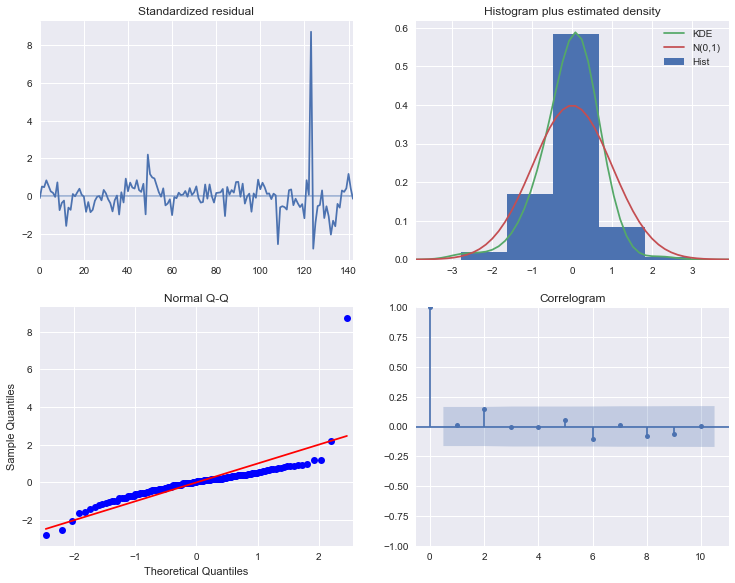

In [893]:
results  = arimamodel(finalDataFrame['count'])
results.plot_diagnostics()
plt.show()

Above Q-Q plots show no boious patterns in the residuals,normal distribution of the residuals.
ACF plot are all inside the blue are which means lag greater than 1 should not be significant.Overall seems a good model.

In [894]:
mae = np.mean(np.abs(model_fit.resid))
print('Mae: %.3f' % mae)

Mae: 360.750


### Implementing SARIMA:

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

In [896]:
#Functions to implement SARIMA
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

def evaluate_sarima(data,order,seasonal_order,forecast_periods):
    
    #preparing training dataset 
    val = int(len(data)* 0.1)
    size = int(len(data) * 0.7)
    validation_set = data[0:val]
    train,test = data[val:size],data[size:len(data)]
    #print(validation_set)
   
    data_series =[x for x in train]
    
    #making predictions
    sarimax_results = []
    predictions = []
    for i in range(len(test)):
        model = SARIMAX(data_series,order = order)
        sarimax_results = model.fit(dis=0)
        yhat = sarimax_results.forecast()[0]
        predictions.append(yhat)
        data_series.append(test[i])
        
    #Calculating future_forecast.
    future_forecast = model_fit.forecast(forecast_periods)[0]
    future_dates = [test.index[-1] + timedelta(i*365/12) for i in range(1,forecast_periods+1)]
    test_dates = test.index 
    
    # creates pandas series with datetime index for the predictions and forecast values
    forecast = pd.Series(future_forecast, index=future_dates)
    predictions = pd.Series(predictions, index=test_dates)
    
    # Plotting predictions with test data:
    fig = plt.figure(figsize=(10,5))
    plt.plot(test, label='Test')
    plt.plot(predictions ,linestyle="--" ,label = 'Predicted')
    plt.legend(loc='best')
    plt.show()
    #plotting predicted with forecast
    fig = plt.figure(figsize=(10,5))
    plt.plot(test , label = 'Test')
    plt.plot(forecast,linestyle="--", label='Forecast')
    plt.legend(loc='best')
    plt.show()
   
    print("-----------------------------------------------------")
    print("Values for test",test[:10])
    print("----------------------------------------------------")
    print("Values for Predictions",predictions[:10])
    print("----------------------------------------------------")
    
    #calculate the mean absolute error from residuals
    mae = np.mean(np.abs(sarimax_results.resid))
    print('The Mean absolute Error of our forecasts is {}'.format(round(mae, 4)))
    
    MAPE= mean_absolute_percentage_error(test, predictions)
    print('The Mean absolute Percentage Error of our predictions is {}'.format(round(MAPE, 4)))  
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    #Normalized rmse values
    norm_rmse = rmse/(data.max()-data.min())
    print('The Normalized RMSE value is {}'.format(round(norm_rmse, 4)))
    return sarimax_results
    

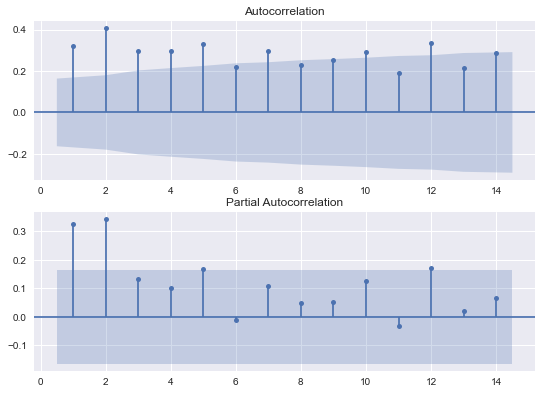

In [897]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(finalDataFrame['count'], lags=14, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(finalDataFrame['count'], lags=14, zero=False, ax=ax2)

plt.show()

In [898]:
# Take the first and seasonal differences (S=7) and drop NaNs
finalDataFrame_diff = finalDataFrame['count'].diff(1).dropna()

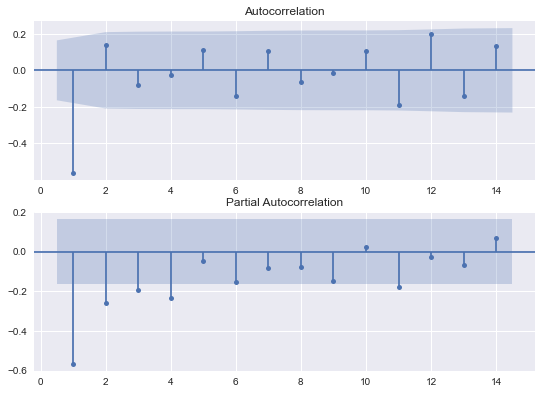

In [899]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(finalDataFrame_diff, lags=14, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(finalDataFrame_diff, lags=14, zero=False, ax=ax2)

plt.show()

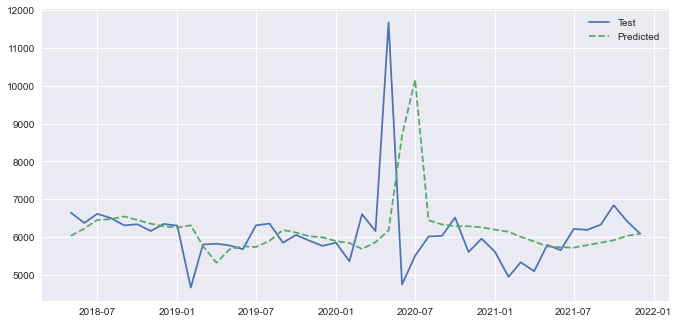

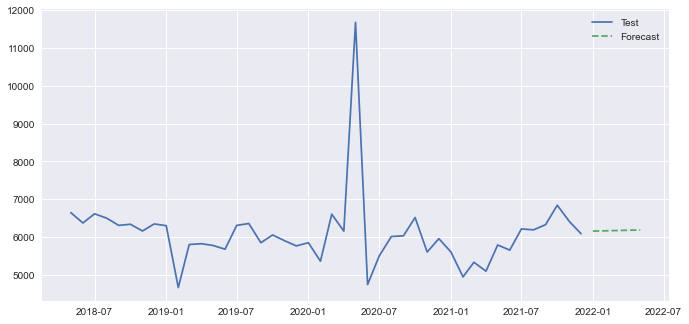

-----------------------------------------------------
Values for test Year/Month
2018-05-01    6650
2018-06-01    6376
2018-07-01    6618
2018-08-01    6504
2018-09-01    6312
2018-10-01    6342
2018-11-01    6164
2018-12-01    6350
2019-01-01    6305
2019-02-01    4670
Name: count, dtype: int64
----------------------------------------------------
Values for Predictions Year/Month
2018-05-01    6037.697179
2018-06-01    6227.130885
2018-07-01    6456.807168
2018-08-01    6474.898062
2018-09-01    6547.275631
2018-10-01    6452.623667
2018-11-01    6355.897607
2018-12-01    6287.062466
2019-01-01    6253.675126
2019-02-01    6312.341274
dtype: float64
----------------------------------------------------
The Mean absolute Error of our forecasts is 418.2909
The Mean absolute Percentage Error of our predictions is 0.1097
The Normalized RMSE value is 0.1779


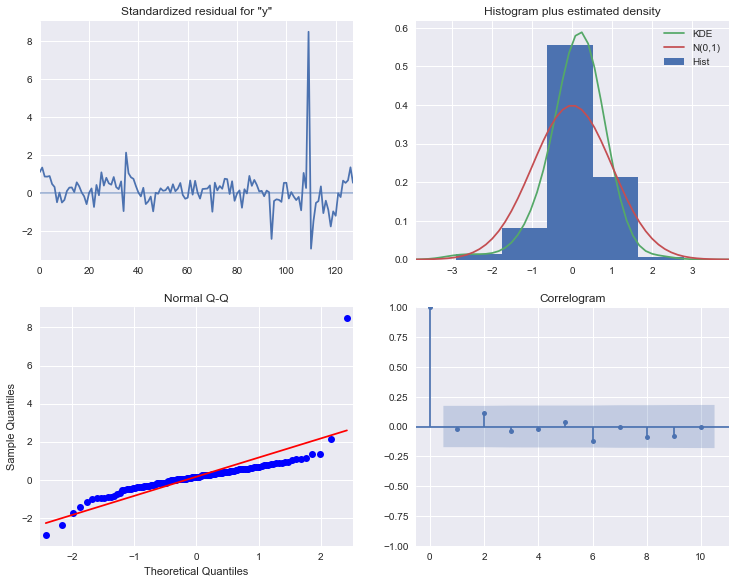

In [900]:
#for order of p,d,q
#sARIMA(1) for order of 1,1,1
order=(1,1,1)
seasonal_order =(0,1,1,2)
periods=5
sarimax_results1 = evaluate_sarima(finalDataFrame['count'],order,seasonal_order,periods)
sarimax_results1.summary()
sarimax_results1.plot_diagnostics()
plt.show()

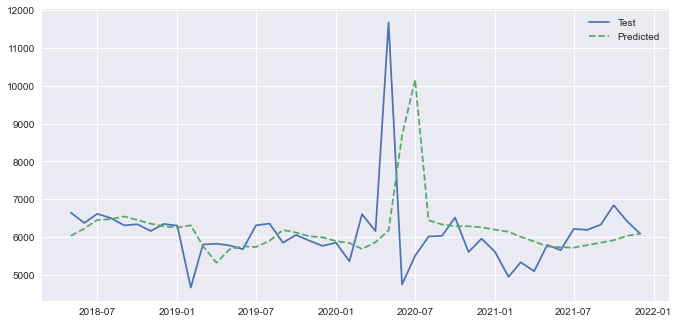

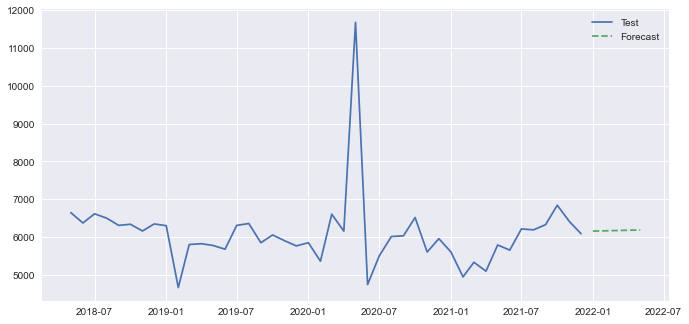

-----------------------------------------------------
Values for test Year/Month
2018-05-01    6650
2018-06-01    6376
2018-07-01    6618
2018-08-01    6504
2018-09-01    6312
2018-10-01    6342
2018-11-01    6164
2018-12-01    6350
2019-01-01    6305
2019-02-01    4670
Name: count, dtype: int64
----------------------------------------------------
Values for Predictions Year/Month
2018-05-01    6037.697179
2018-06-01    6227.130885
2018-07-01    6456.807168
2018-08-01    6474.898062
2018-09-01    6547.275631
2018-10-01    6452.623667
2018-11-01    6355.897607
2018-12-01    6287.062466
2019-01-01    6253.675126
2019-02-01    6312.341274
dtype: float64
----------------------------------------------------
The Mean absolute Error of our forecasts is 418.2909
The Mean absolute Percentage Error of our predictions is 0.1097
The Normalized RMSE value is 0.1779


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1017.168
Date:                Wed, 09 Mar 2022   AIC                           2040.336
Time:                        14:34:55   BIC                           2048.892
Sample:                             0   HQIC                          2043.812
                                - 129                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0045      0.071     -0.064      0.949      -0.143       0.134
ma.L1         -0.8737      0.065    -13.526      0.000      -1.000      -0.747
sigma2      4.464e+05   1.26e+04     35.427      0.000    4.22e+05    4.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6987.35
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               5.19   Skew:                             4.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [905]:
#for order of p,d,q
#SARIMAX(3) for order of 1,1,1
order=(1,1,1)
seasonal_order =(1,1,1,6)
periods=5
Sarimax_results2 = evaluate_sarima(finalDataFrame['count'],order,seasonal_order,periods)
Sarimax_results2.summary()

lets' try automated paramter selection for SARIMA.

In [906]:
#Automated parameter selection fot SARIMA.
Sarimax_model = auto_arima(finalDataFrame['count'],
                       start_P=1,
                       start_q=1,
                       max_p=6,
                       max_q=6,
                       m=12,
                       seasonal=True,
                       d=1,
                       D=1,
                       trace=True,
                       information_criterion='aic',
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
Sarimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=2078.068, Time=1.42 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2217.220, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2116.398, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2077.858, Time=0.94 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2074.372, Time=1.74 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2086.656, Time=0.53 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=2076.304, Time=1.89 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.14 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=inf, Time=1.13 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=4.61 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=2144.433, Time=0.53 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2076.395, Time=1.66 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1033.186
Date:                            Wed, 09 Mar 2022   AIC                           2074.372
Time:                                    14:35:31   BIC                           2085.872
Sample:                                         0   HQIC                          2079.045
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8708      0.038    -22.944      0.000      -0.945      -0.796
ar.S.L12      -0.3210      0.225     -1.427      0.154      -0.762       0.120
ma.S.L12      -0.6518      0.268     -2.433      0.015      -1.177      -0.127
sigma2      3.731e+05    1.8e+04     20.766      0.000    3.38e+05    4.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              8445.71
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               5.44   Skew:                             4.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

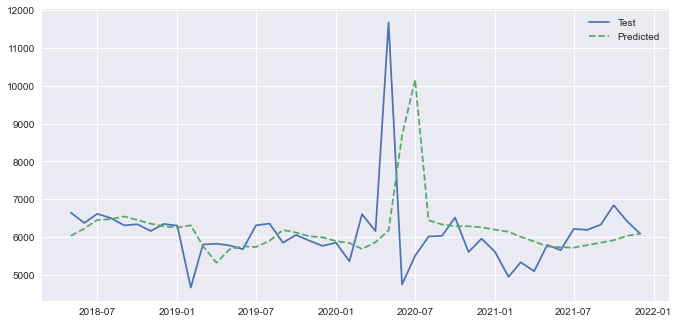

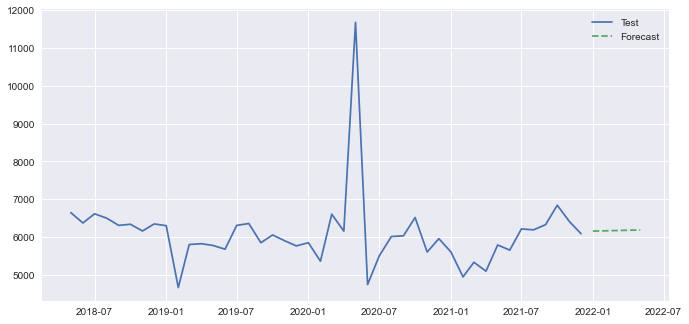

-----------------------------------------------------
Values for test Year/Month
2018-05-01    6650
2018-06-01    6376
2018-07-01    6618
2018-08-01    6504
2018-09-01    6312
2018-10-01    6342
2018-11-01    6164
2018-12-01    6350
2019-01-01    6305
2019-02-01    4670
Name: count, dtype: int64
----------------------------------------------------
Values for Predictions Year/Month
2018-05-01    6037.697179
2018-06-01    6227.130885
2018-07-01    6456.807168
2018-08-01    6474.898062
2018-09-01    6547.275631
2018-10-01    6452.623667
2018-11-01    6355.897607
2018-12-01    6287.062466
2019-01-01    6253.675126
2019-02-01    6312.341274
dtype: float64
----------------------------------------------------
The Mean absolute Error of our forecasts is 418.2909
The Mean absolute Percentage Error of our predictions is 0.1097
The Normalized RMSE value is 0.1779


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1017.168
Date:                Wed, 09 Mar 2022   AIC                           2040.336
Time:                        15:00:45   BIC                           2048.892
Sample:                             0   HQIC                          2043.812
                                - 129                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0045      0.071     -0.064      0.949      -0.143       0.134
ma.L1         -0.8737      0.065    -13.526      0.000      -1.000      -0.747
sigma2      4.464e+05   1.26e+04     35.427      0.000    4.22e+05    4.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6987.35
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               5.19   Skew:                             4.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [914]:
#for order of p,d,q
#SARIMAX(2) for order of 1,1,1
order=(1,1,1)
seasonal_order =(1,1,1,2)
periods=5
Sarimax_results2 = evaluate_sarima(finalDataFrame['count'],order,seasonal_order,periods)
Sarimax_results2.summary()

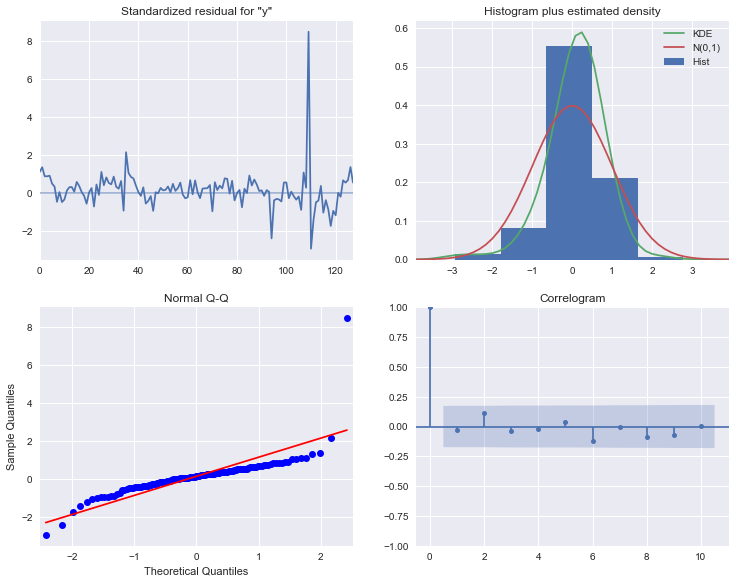

In [908]:
#Let's plot 4 diagnostic plots to see residuals in 4 different ways.
Sarimax_results2.plot_diagnostics()
plt.show()

### Forecasting ARIMA & SARIMA results:

SARIMA vs ARIMA forecasts:

We compared our 3 SARIMA models to our Baseline ARIMA model and picked up the best 2.
## * Forecasting in Sample
To see how good the  models are doing we will take 10% of the data as validation data.
* Metrics Used to Compare Models:
The models choosen here will be evaluated using MAE (Mean Absolute Error) and MAPE (Mean Absolute Percentage Error). These are popular metrics when evaluating forecasting models.
When comparing forecast methods applied to a single time series, or to several time series with the same units, MAE is popular as it is easy to both understand and compute. Percentage errors measures such as MAPE have the advantage of being unit-free, and so are frequently used to compare forecast performances between data sets.
Source:[https://sailajakarra.medium.com/time-series-predictions-using-arima-sarimax-e6724844cae0]

In [909]:
arima_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  128
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1013.615
Method:                       css-mle   S.D. of innovations            659.896
Date:                Wed, 09 Mar 2022   AIC                           2033.230
Time:                        14:35:36   BIC                           2041.786
Sample:                             1   HQIC                          2036.706
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8638      4.561      2.163      0.031       0.925      18.803
ma.L1.D.y     -0.9305      0.041    -22.852      0.000      -1.010      -0.851
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0747           +0.0000j            1.0747            0.0000
-----------------------------------------------------------------------------
"""

In [615]:
sarimax_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1017.168
Date:                Wed, 09 Mar 2022   AIC                           2040.336
Time:                        09:24:57   BIC                           2048.892
Sample:                             0   HQIC                          2043.812
                                - 129                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0045      0.071     -0.064      0.949      -0.143       0.134
ma.L1         -0.8737      0.065    -13.526      0.000      -1.000      -0.747
sigma2      4.464e+05   1.26e+04     35.427      0.000    4.22e+05    4.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6987.35
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               5.19   Skew:                             4.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecasting with our Out of Sample set:

We will be sampling with our Arima01(0,1,1) and SARIMAX(1,1,1)(1,1,1,2) with a period od 24 and see how the models perform.


In [747]:
arima_model = ARIMA(finalDataFrame, order=(1,1,1))
# fit model
arima_results = arima_model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae)

MAE: 360.475


In [748]:
forecast_arima = arima_results.predict(start = len(finalDataFrame['count']),
                           end=len(finalDataFrame['count'])+24,
                           typ='levels').rename('arima(0,1,1)')
                        

<AxesSubplot:xlabel='Year/Month'>

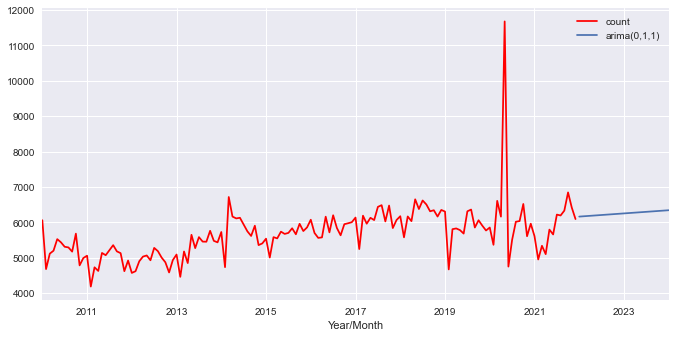

In [749]:
finalDataFrame['count'].plot(figsize=(10,5),legend=True,color='r')
forecast_arima.plot(legend=True)

For sarima

In [772]:
sarima_model = SARIMAX(finalDataFrame, order=(1,1,1),seasonal_order =(1,1,1,12))
# fit model
sarima_results = sarima_model.fit()
# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(sarima_results.resid))
# Print mean absolute error
print('MAE: %.3f' % mae)

MAE: 386.576


In [773]:
forecast_sarima = sarima_results.predict(start = len(finalDataFrame['count']),
                           end=len(finalDataFrame['count'])+24,
                           typ='levels').rename('sarima(1,1,1)(1,1,1,12)')
                        

<AxesSubplot:xlabel='Year/Month'>

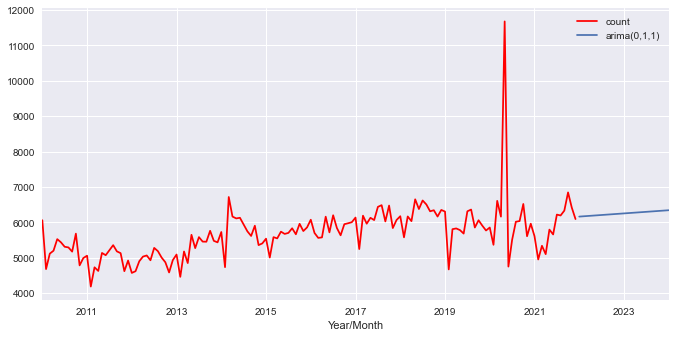

In [774]:
finalDataFrame['count'].plot(figsize=(10,5),legend=True,color='r')
forecast_arima.plot(legend=True)

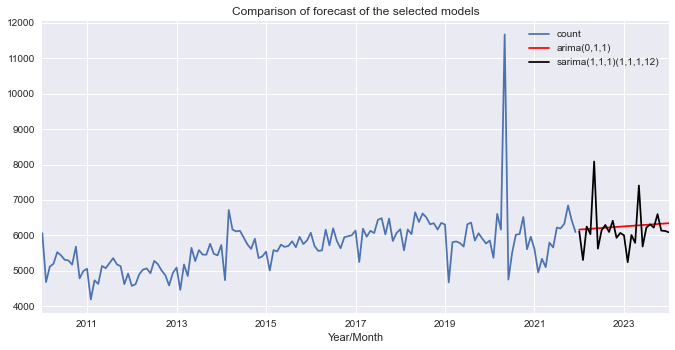

In [776]:
#ploting the forecast results for arima and sarima:
dates = finalDataFrame.index
finalDataFrame['count'].plot(figsize=(10,5),legend=True)
forecast_arima.plot(legend=True,color ='red')
forecast_sarima.plot(legend=True,color='black')
plt.title("Comparison of forecast of the selected models")
plt.show()

In [915]:
df_arima_results = pd.DataFrame({'metrics':['MAE'],
              'ARIMA(0,1,1)': 360.47, 
              'SARIMA(1,1,1)(1,1,1)12': 386.00,
             })

df_arima_results

,metrics,"ARIMA(0,1,1)","SARIMA(1,1,1)(1,1,1)12"
0,MAE,360.47,386.0


Our Sarima model follows the time series better. Arima model completely ignored the seasonal information,is not a good representation for the forecast.

Saving the model:

In [782]:
# Import pickle
import pickle

# Set model name
filename = "../finalDataFrame.pkl"

# Pickle it
with open('filename.txt','wb') as fh:
    pickle.dump(sarima_model,fh)



In [787]:
pickle_off = open("filename.txt","rb")
loaded_model = pickle.load(pickle_off)
loaded_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              count   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1033.198
Date:                            Wed, 09 Mar 2022   AIC                           2076.395
Time:                                    13:42:40   BIC                           2090.771
Sample:                                01-01-2010   HQIC                          2082.237
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0574      0.001    -44.538      0.000      -0.060      -0.055
ma.L1         -0.6523      0.000  -3303.519      0.000      -0.653      -0.652
ar.S.L12      -0.8826      0.000  -6046.620      0.000      -0.883      -0.882
ma.S.L12      -0.0359      0.001    -27.870      0.000      -0.038      -0.033
sigma2      8.738e+05   1.47e-10   5.93e+15      0.000    8.74e+05    8.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              8473.34
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               5.49   Skew:                             4.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.12e+30. Standard errors may be unstable.
"""

# Conclusions:

We used ARIMA models and its variants: Seasonal ARIMA (SARIMA) and ARIMAX which uses external data (exogenous inputs) to improve the performance of the ARIMA model.
We followed the Box-Jenkins method to find the best model considering a part of our dataset (time series of sales of product 28 of Walmart's store 2). As first step we've identified important characteristics of our time series such as stationarity and seasonality.
Then, we also used graphical and statistical methods such as follows to find the best fit model:
* Augmented Dickey-Fuller test,
* ACF and PACF plots analysis,
* Exploring model summary statistics,
* Analyze plots obtained using the statsmodel method plot_diagnostics.

We chose Arima(0,1,1) & Sarima(1,1,1)(1,1,1,12) as our best one's.The MAPE & MAE on both the models were least. Out of these two SARIMAX performed better on the forecast hence we choose this as our final model
                                                                                           

### Limitations:
Model seems to performing well for forecasting but might be overfitting the data.It can be explored more to understand the time series btter.


### Future Work:
Would like to see how the time series iwll perform with more advanced time series models like prophet.